# Problem statement

Human resource capital is one of the cogs that play a vital role in an organization's success. Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well.

Having said that, employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff. A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people.

As such, there is great business interest in understanding the drivers of, and minimizing staff attrition. While some level of attrition in a company is inevitable, minimizing it and being prepared for the cases that cannot be helped will significantly help improve the operations of most businesses. In pursuit of solving this real-world problem, let's conduct some statistical analysis on employee data of an organization to find out which factors are driving the attrition. To augment, let's build a prediction model to identify employees who are likely to quit and enable HRs to intervene with human element of reaching out to employee, understanding the current situation of the employee and taking action to remedy controllable factors that can prevent attrition of the employee.

# Introduction

**Data Scource:**

This dataset is provided by IBM Watson labs. IBM has gathered employee related information on employee's demographics, personal, professional variables. It includes the data of 1470 employees.

**Variable information:**

| Variable | Description |
|----------|-------------|
|Age|Age of employee|
|Attrition|Employee leaving the company (Yes/No)|
|Business Travel|Frequency of business travel (No Travel, Travel Frequently, Tavel Rarely)|
|Department|Department where employee works (HR, R&D, Sales)|
|Distance From Home|Commute distance between home and office|
|Education|Highest level of education employee had pursued (1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctorate)|
|Education Field|Field of education (HR, Life Sciences, Marketing, Medical Sciences, Technical, Others)|
|Employee Number|Employee identification number|
|Environment Satisfaction|Employee satisfaction with work environment (1-Low, 2-Medium, 3-High, 4-Very High)|
|Gender|Gender of employee (Female/Male)|
|Job Involvement|Level of involvement of employee with job (1-Low, 2-Medium, 3-High, 4-Very High)|
|Job Level|Job hierarchy level|
|Job Role|Job role of employee (HC Rep, HR, Lab Technician, Manager, Managing Director, Research Director,Research Scientist, Sales Executive, Sales Representative)|
|Job Satisfaction|Satisfaction rating with the job (1-Low, 2-Medium, 3-High, 4-Very High)|
|Marital Status|Marital status of employee (Divorced, Married, Single)|
|Monthly Income|Monthly salary of employee|
|Num Companies Worked|Number of companies employee had worked at|
|Overtime|Does employee have to work overtime (No/Yes)|
|Percent Salary Hike|Latest percentage increase in salary employee recieved|
|Performance Rating|Latest performance rating employee recieved (1-Low, 2-Good, 3-Excellent, 4-Outstanding)|
|Relationship Satisfaction|Satisfaction rating of employee with his relationship (1-Low, 2-Medium, 3-High, 4-Very High)|
|Stock Options Level|Level of stock options employee has|
|Total Working Years|Total number of years an employee worked for|
|Training Times Last Year|Number of times employee recieved training in previous year|
|Work Life Balance|Employee rating of work life balance (1-Bad, 2-Good, 3-Better, 4-Best)|
|Years At Company|Total number of years an employee worked with the company|
|Years In Current Role|Total number of years an employee spent in current job role|
|Years Since Last Promotion|Total number of years since employee recieved last promotion|
|Years With Current Manager|Total number of years employee worked with current manager|

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, binarize
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# dataframe display settings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# style setting
plt.style.use('seaborn')

C:\DataScience\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Understanding the data

## Reading data

In [2]:
# reading data from csv file and creating a dataframe
df = pd.read_csv("C:/Users/shara/Desktop/Projects/EmployeeAttrition/HR-Employee-Attrition.csv")

In [3]:
# dimensions of dataframe
print(f"This dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

This dataframe has 1470 rows and 29 columns.


In [4]:
# first five rows in dataframe
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


In [5]:
# last five rows in dataframe
df.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,4,2,Laboratory Technician,4,Married,2571,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,2,3,Healthcare Representative,1,Married,9991,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,4,2,Manufacturing Director,2,Married,6142,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,2,2,Sales Executive,2,Married,5390,2,No,14,3,4,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,Research & Development,8,3,Medical,2068,2,Male,4,2,Laboratory Technician,3,Married,4404,2,No,12,3,1,0,6,3,4,4,3,1,2


In [6]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

**Observations:**
* There are no missing values, that's good news.
* This dataset has only `object` and `integer` type data. No `datetime` variables.

## Summarising the data

In [7]:
# checking the missing values
pd.DataFrame(zip(df.columns, df.isna().sum(), round(df.isna().sum() / df.shape[0] * 100, 2)), columns=["Variable", "Missing values count","% missing values"]).style.background_gradient(cmap='coolwarm', low=0.2, high=0.2)

,Variable,Missing values count,% missing values
0,Age,0,0.000000
1,Attrition,0,0.000000
2,BusinessTravel,0,0.000000
3,Department,0,0.000000
4,DistanceFromHome,0,0.000000
5,Education,0,0.000000
6,EducationField,0,0.000000
7,EmployeeNumber,0,0.000000
8,EnvironmentSatisfaction,0,0.000000
9,Gender,0,0.000000


**Observations:**
* We are lucky to have a clean data set, we have no missing values.

In [8]:
# summary statistics of numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0


In [9]:
# summary statistics of categorical variables
df.describe(include='object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


**Observations:**
* Let's explore each variable using charts and graphs in univariate analysis.

# Exploratory Data Analysis

## Univariate analysis

In [10]:
# identifying categorical and continuous variables
continuous_variables = ['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TrainingTimesLastYear','TotalWorkingYears','NumCompaniesWorked','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
categorical_variables = ['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','OverTime','WorkLifeBalance','RelationshipSatisfaction','StockOptionLevel','PerformanceRating']

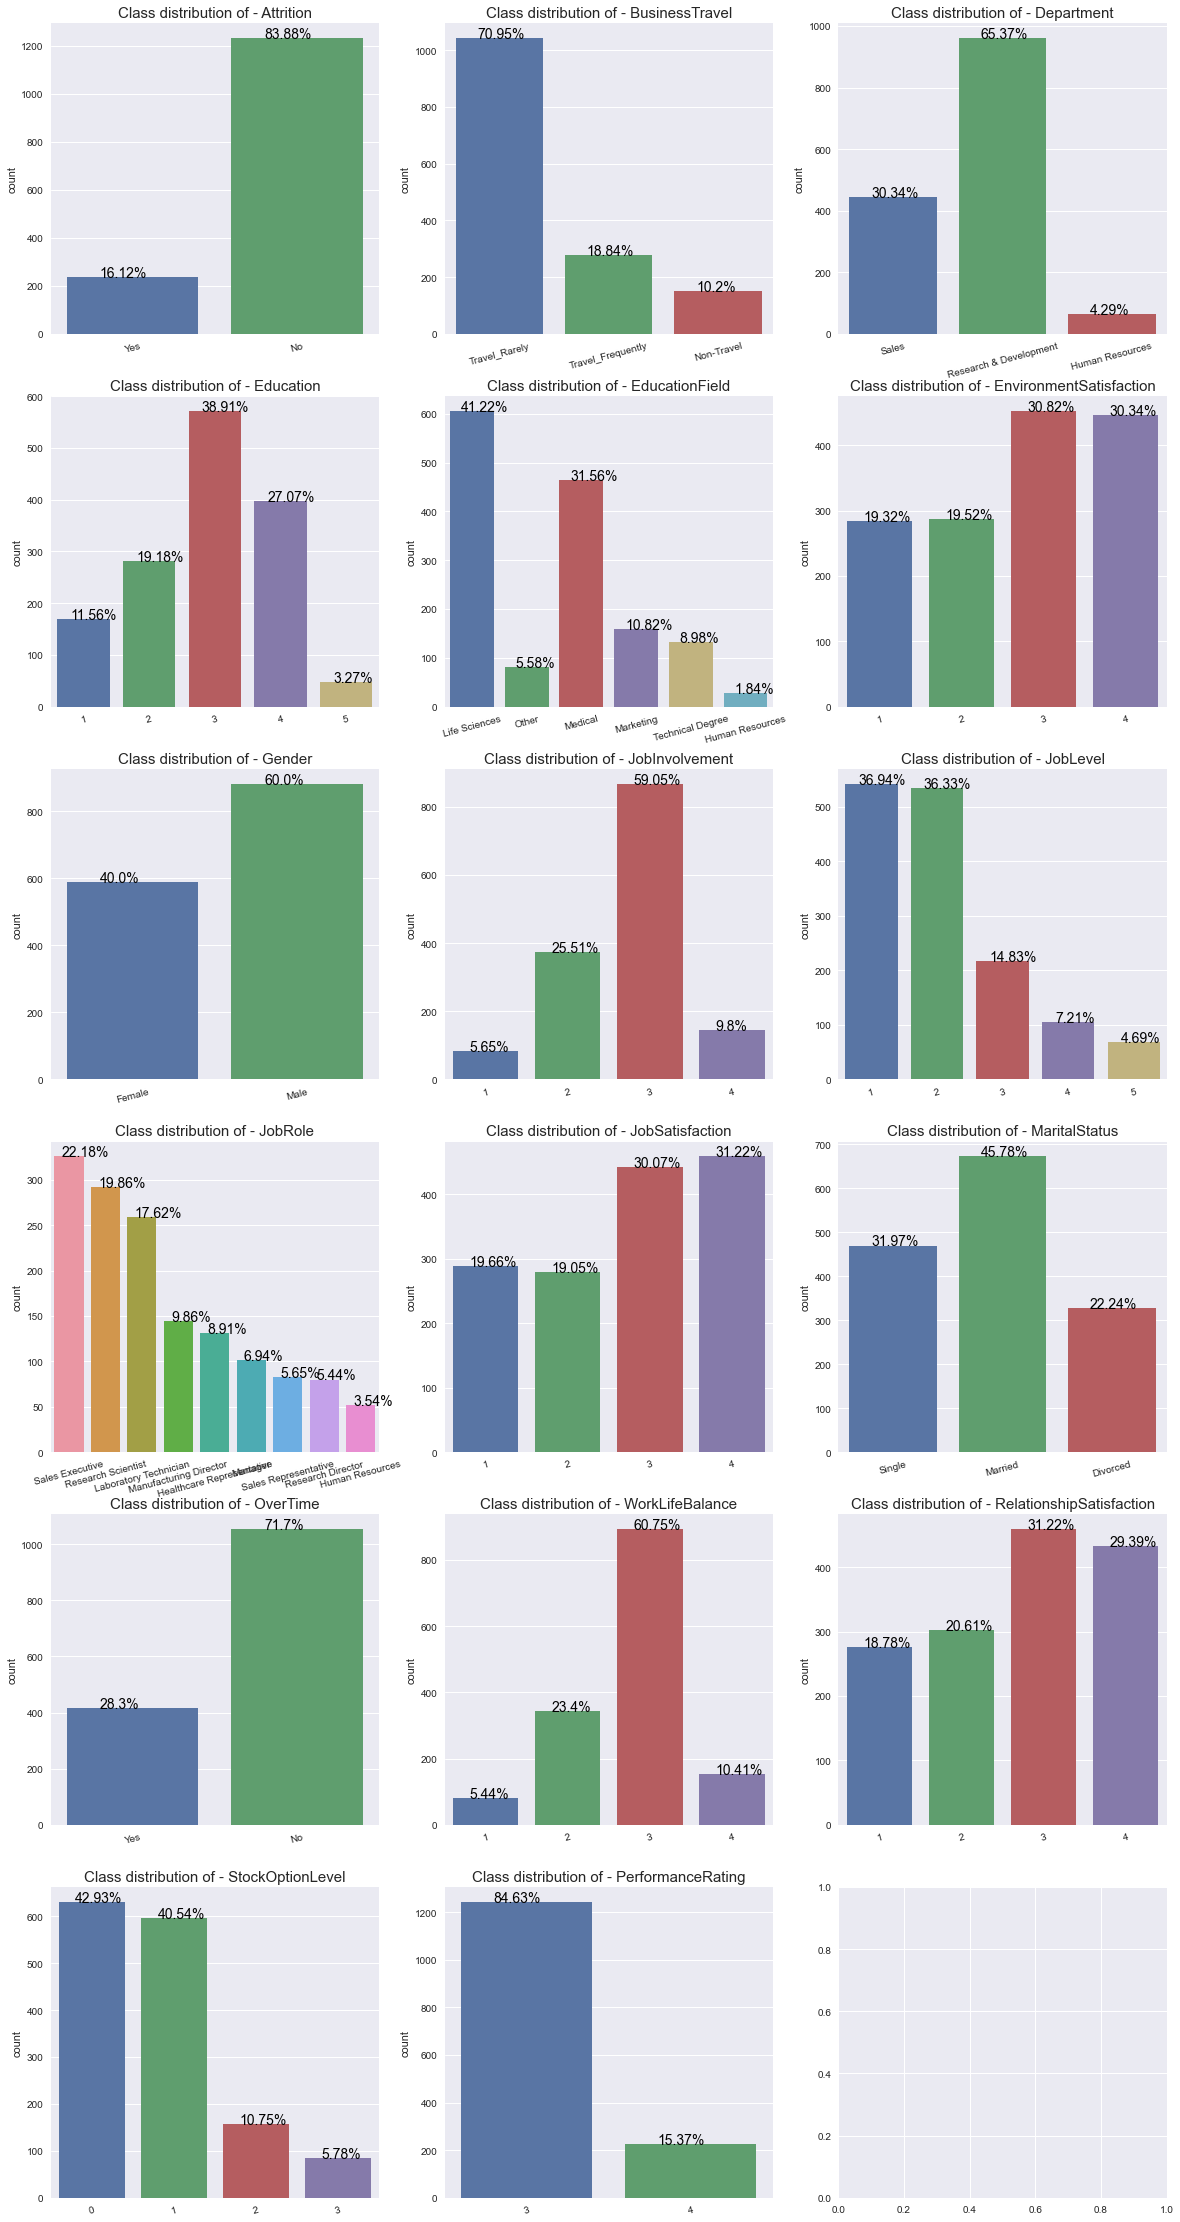

In [11]:
# plotting categorical variables
plt.subplots(6,3, figsize=(20,40))
for plot in range(0,len(categorical_variables)):
    plt.subplot(6,3,plot+1)
    ax = sns.countplot(df[categorical_variables[plot]])
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+0.2, i.get_height(), str(round(i.get_height()/len(df)*100, 2))+"%", fontsize=14, color='black')
    plt.title("Class distribution of - " + categorical_variables[plot], fontsize = 15)
    plt.xticks(rotation=15)
    plt.xlabel('')
plt.show()

**Observations:**
* `Attrition` - Majority (84%) of the employees are not willing to churn.
* `Attrition` - There seems to be class imbalance in target variable with 16% of observations in minority class (`Yes`). But, this sort of imbalance does not affect the model performance much.
* `Business Travel` - Majority (71%) of employees have jobs that do not require frequent travelling.
* `Department` - Majority (65%) of employees work in Research & Development department.
* `Education Level` - Majority (39%) of employees have Bachelor level degree, only (3%) have PhD.
* `Education Field` - Majority (73%) of employees are having education background in Life Science and Medical field.
* `Job Involvement` - Majority (59%) of employees are having high level of job involvement.
* `Job Level` - Majority (73%) of employees work in lower job levels (1 & 2).
* `Job Level` - Majority (61%) of employees are having high level of job satisfaction (High & Very High).
* `Over Time` - Majority (72%) of employees have no over time at work.
* `Work Life Balance` - Majority (61%) of employees have high work life balance.
* `Stock Option Level` - Majority (83%) of employees are not having any stock options. It's expected since only executive level employees and senior employees are given such options.
* `Performance Rating` - Majority (85%) of employees were giving Excellent rating. Every employee is given a high performance rating.

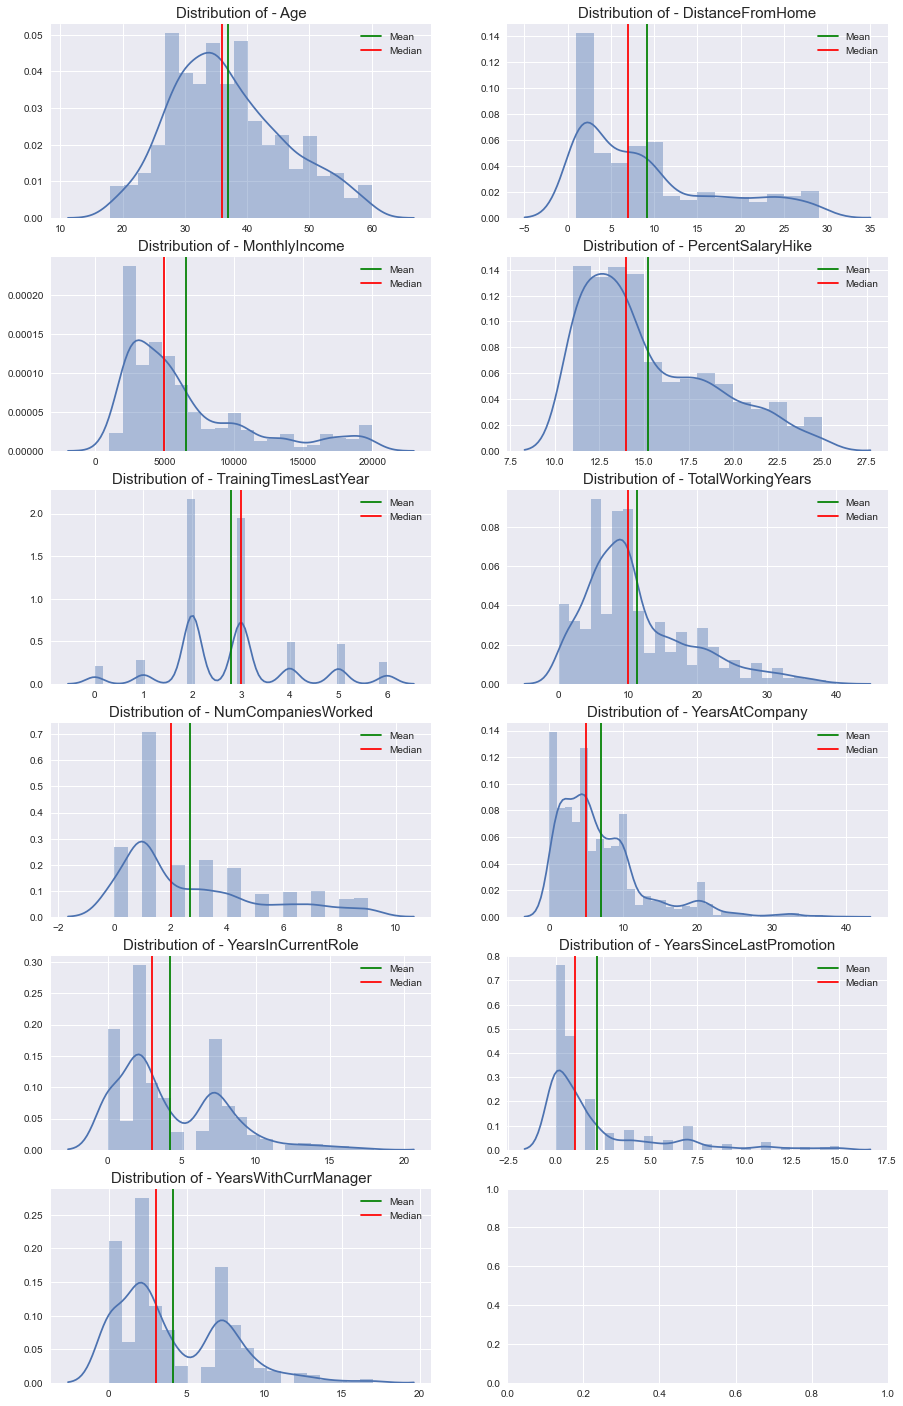

In [12]:
# plotting continuous variables
plt.subplots(6,2, figsize=(15,25))
for plot in range(1,len(continuous_variables)+1):
    plt.subplot(6,2,plot)
    sns.distplot(df[continuous_variables[plot-1]])
    plt.axvline(df[continuous_variables[plot-1]].mean(), color="g", label="Mean")
    plt.axvline(df[continuous_variables[plot-1]].median(), color="r", label="Median")
    plt.legend()
    plt.title("Distribution of - " + continuous_variables[plot-1], fontsize = 15)
    plt.xlabel('')
plt.show()

**Observations:**
* All the above variables are right skewed.
* `Age` - Age range is 18 - 60 years, which is expected. Mean and Median `Age` is around 36.
* `DistanceFromHome` - Majority of employees are staying wihin 10 miles from work location.
* `MonthlyIncome` - Median income is around $5000. High skewness towards higher income is probably due to executive level employees working at company.
* `PercentSalaryHike` - Majority of employees recieved a hike in 11% - 15% range. There is a skewness towards higher hike percentage values.
* `TotalWorkingYears` - Average years of work experience of employees is 10 years.
* `YearsAtCompany` - On an average, an employee is expected to stay 7 years at the company.

## Bivariate analysis

### Correlation matrix

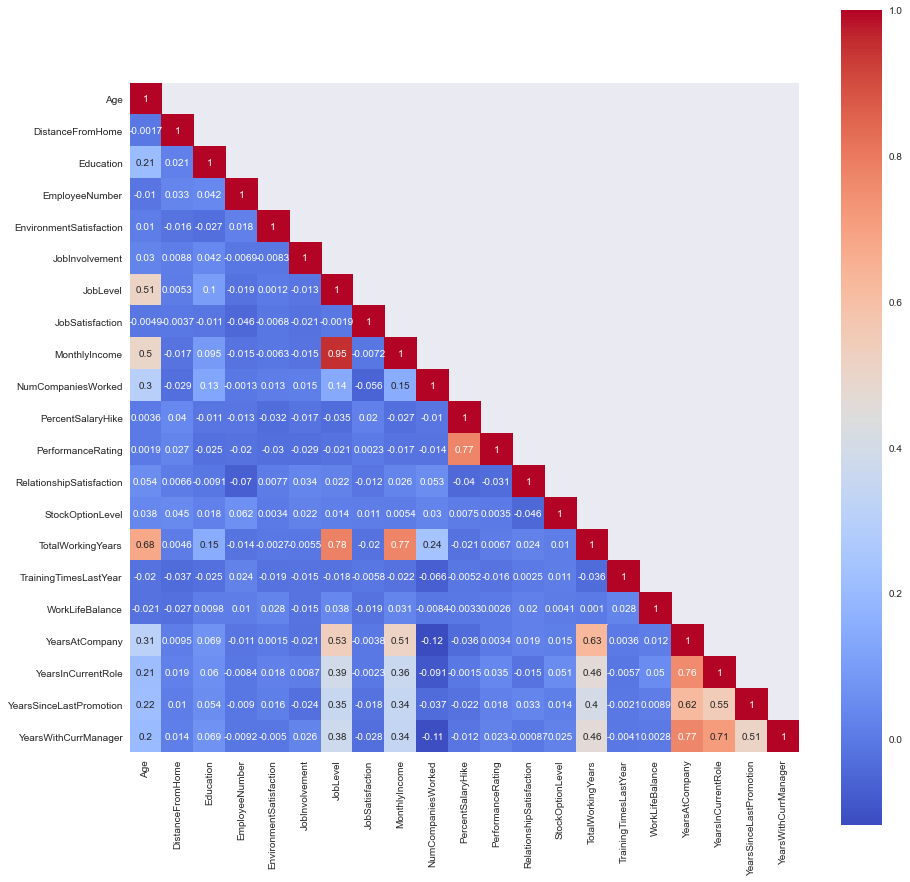

In [13]:
# heatmap of correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, square=True, mask=np.triu(df.corr(), 1), cmap='coolwarm')
plt.show()

**Observations:**
* High positive correlation
    1. `MonthlyIncome` & `JobLevel` - It's expected that as job level increases, income increases.
    2. `TotalWorkingYears` & `JobLevel` - It's expected that as years of working experience increases, employee gets promoted to higher job levels.
    3. `TotalWorkingYears` & `MonthlyIncome` - It's expected that as years of working experience increases, income increases.
    4. `PerformanceRating` & `PercentSalaryHike` - It's expected that higher performance rating yields higher percent salary hike.
    5. `YearsInCurrentRole` & `YearsAtCompany` - A high correlation suggests that employees tend to stay in same role at the same company. In other words, it's less likely to get a promotion if one wishes to stay at same company.
    6. `YearsSinceLastPromotion` & `YearsAtCompany` - A high correlation further supports our above point.
    7. `YearsInCurrentRole` & `YearsWithCurrManager` - A high correlation suggests that employees tend to work with same manager as long as they stay in same role.

In short, for most of the time, employees work in same job role, work with same manager.

A high correlation between `YearsSinceLastPromotion` & `YearsAtCompany` and a low correlation between `YearsSinceLastPromotion` & `JobLevel` suggests that employees are less likely to get a promotion when stayed at same company.

### Comparision of medians in both the classes of attrition

Since most of the continuous variables are right skewed, we will use median to represent population instead of mean.

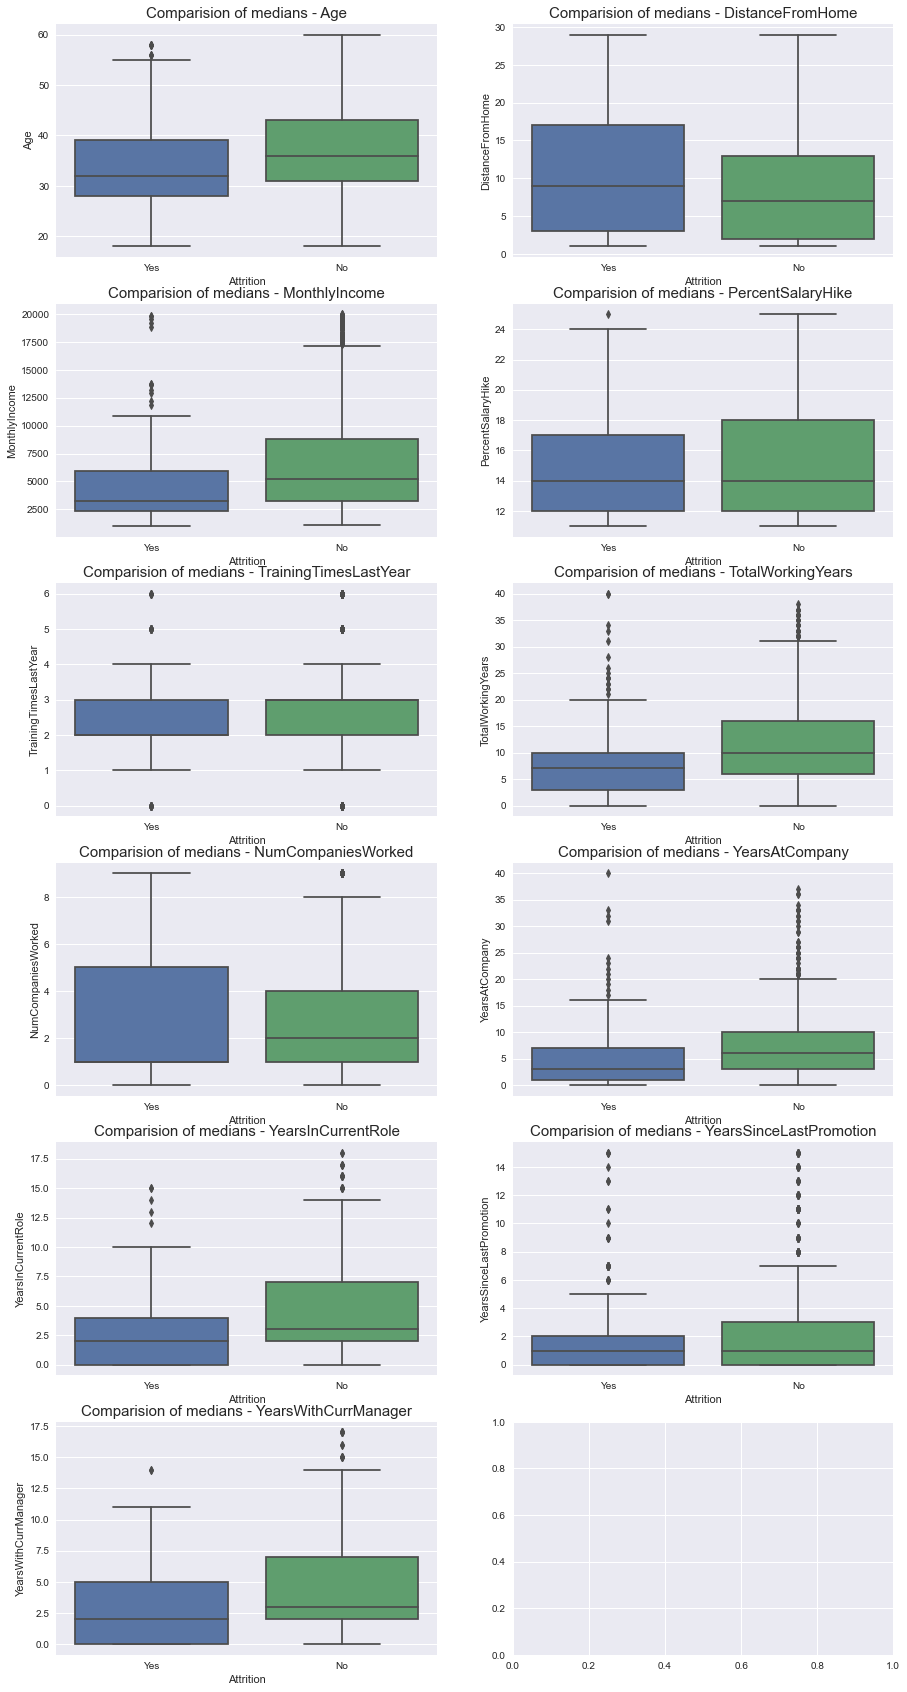

In [14]:
# plotting continuous variables
plt.subplots(6,2, figsize=(15,30))
for plot in range(1,len(continuous_variables)+1):
    plt.subplot(6,2,plot)
    sns.boxplot('Attrition', df[continuous_variables[plot-1]], data=df)
    plt.title("Comparision of medians - " + continuous_variables[plot-1], fontsize = 15)
plt.show()

**Observations:**
* From `Age`, `TotalWorkingYears`, and `MonthlyIncome` plots, it suggests that employees with lower income and at lower age tend to attrite more.
* Employees who live far from work location tend to attrite more, maybe in search of a job nearer to their home.
* There is no difference in `PercentSalaryHike`, i.e. employees who chose to churn are recieving same salary hike as those who wish to continue.
 
In general, factors like higher income, promotion, less commute distance might be driving employees to churn. Employees who are 35 years or younger tend to churn more.

### Comparision of proportions of attrition class in categorical variables

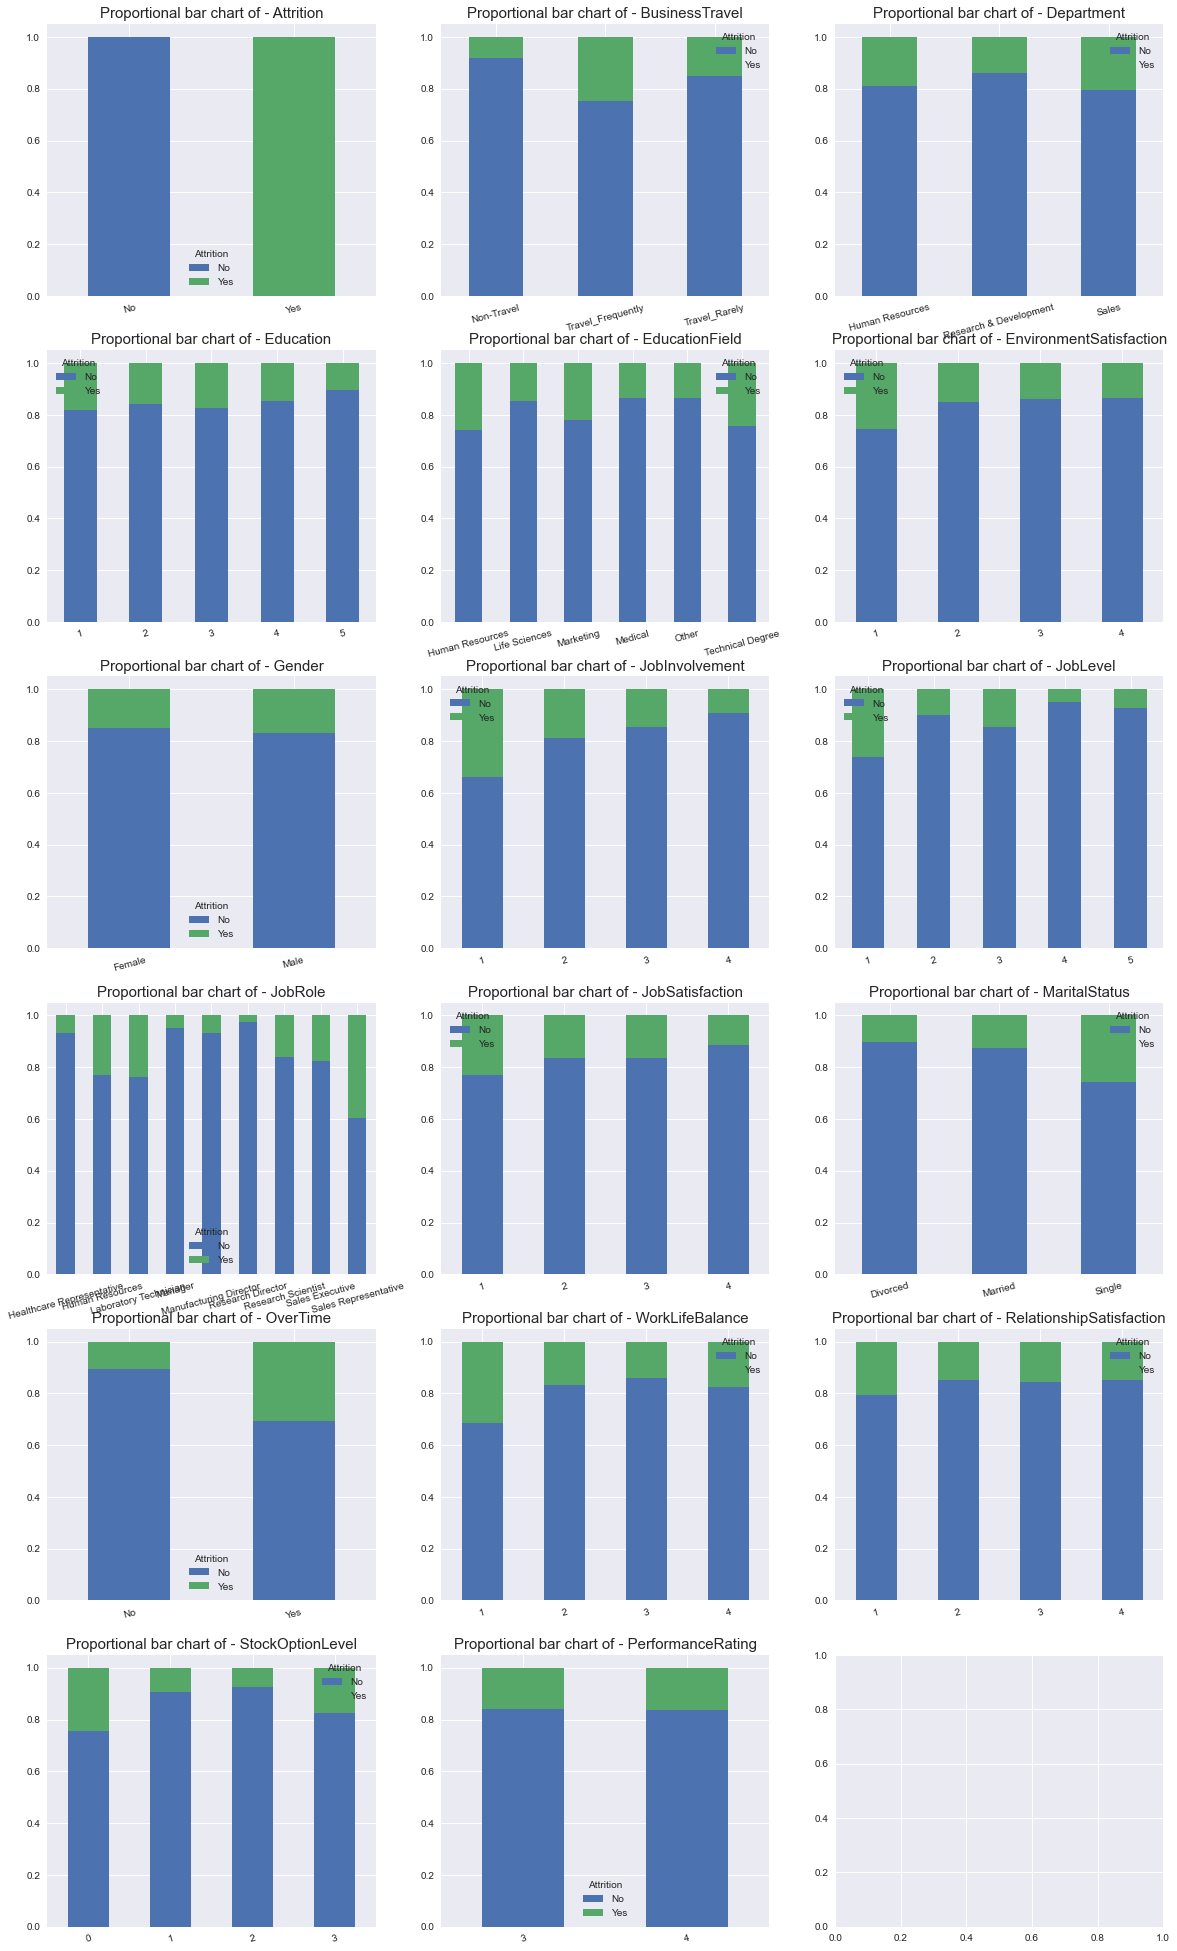

In [15]:
# plotting categorical variables
plt.subplots(6,3, figsize=(20,35))
for plot in range(0,17):
    plt.subplot(6,3,plot+1)
    pd.crosstab(df[categorical_variables[plot]], df['Attrition'], normalize=0).plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title("Proportional bar chart of - " + categorical_variables[plot], fontsize = 15)
    plt.xticks(rotation=15)
    plt.xlabel('')
plt.show()

**Observations:**
* Overtime significantly influences employee attrition. Attrition levels are high in employee group working overtime.

* As frequency of travel requirement increases, employee churn rate increases.
* Employees in technical roles (Sales Representative, Lab Technician, and HR) tend to chrun more. Since sales representative are required to travel more frequently, there is high attrition rate in this job type.

* Employees with lower environment satisfaction, job involvement, job satisfaction, work life balance, and relationship satisfaction tend to churn more.

* Employees at lower education levels and lower job levels have higher attrition rates. In general, factors that are related to age, are showing similar trends.

* Employees who are single have higher attrition rate.

* Gender and performance rating does not influence employee attrition.

### Relationships among independent variables

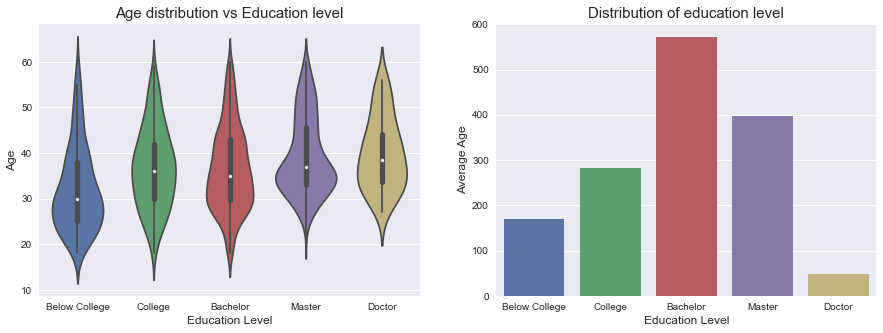

In [16]:
# Age vs Education level
plt.subplots(1,2, figsize=(15,5))

# boxplot
plt.subplot(1,2,1)
sns.violinplot('Education', 'Age', data=df)
plt.title('Age distribution vs Education level', fontsize=15)
plt.xticks(ticks=[0,1,2,3,4], labels=['Below College','College','Bachelor','Master','Doctor'])
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Age', fontsize=12)

# countplot
plt.subplot(1,2,2)
sns.countplot('Education', data=df)
plt.title('Distribution of education level', fontsize=15)
plt.xticks(ticks=[0,1,2,3,4], labels=['Below College','College','Bachelor','Master','Doctor'])
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Age', fontsize=12)

plt.show()

**Observations:**
* Age is positively correlated with Education level.

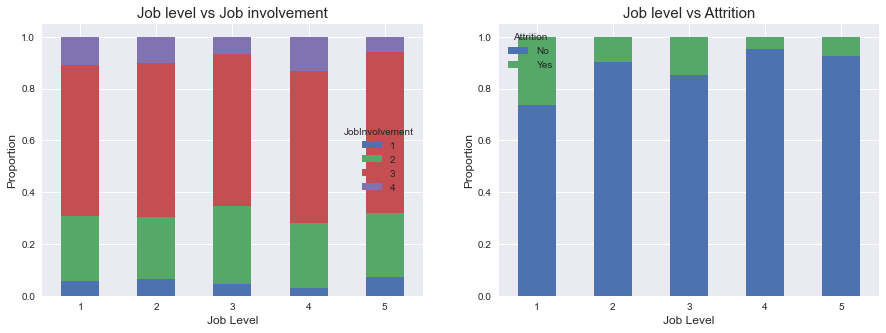

In [17]:
# factors around job level 3
plt.subplots(1,2, figsize=(15,5))

# proportion chart
plt.subplot(1,2,1)
pd.crosstab(df['JobLevel'], df['JobInvolvement'], normalize=0).plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Job level vs Job involvement', fontsize=15)
plt.xlabel('Job Level', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=0)

# proportion chart
plt.subplot(1,2,2)
pd.crosstab(df['JobLevel'], df['Attrition'], normalize=0).plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Job level vs Attrition', fontsize=15)
plt.xlabel('Job Level', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=0)

plt.show()

**Obseravations:**
* We can see that `Job Involvement` levels are lowest in `Job Level` 3 and coincidentally `Attrition` level is relatively high in same employee group. There maybe some factors surrounding this job level that are causing lower levels of job involvement and in turn driving attrition.

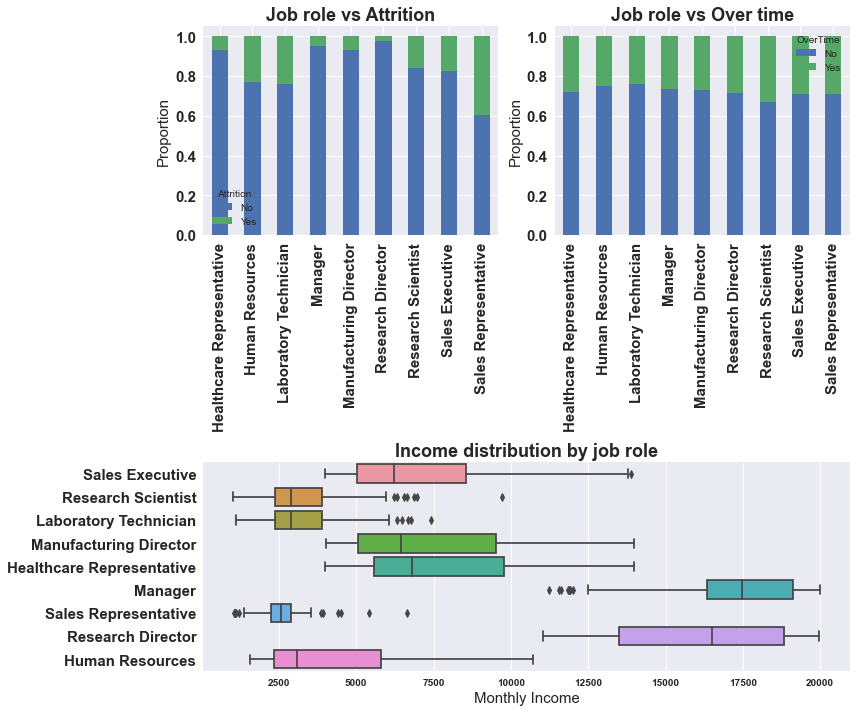

In [122]:
# factors around sales representative
plt.subplots(2,2, figsize=(12,10))

# job role vs attrition
plt.subplot(2,2,1)
pd.crosstab(df['JobRole'], df['Attrition'], normalize=0).plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Job role vs Attrition', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold', fontsize=15)
plt.ylabel('Proportion', fontsize=15)

# job role vs over time
plt.subplot(2,2,2)
pd.crosstab(df['JobRole'], df['OverTime'], normalize=0).plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Job role vs Over time', fontsize=18, fontweight='bold')
plt.xlabel('')
plt.xticks(fontweight='bold', fontsize=15)
plt.yticks(fontweight='bold', fontsize=15)
plt.ylabel('Proportion', fontsize=15)

# job role vs income
plt.subplot(2,2,3)
plt.subplot2grid((2,2), (1, 0), colspan=2)
sns.boxplot('MonthlyIncome', 'JobRole', data=df, orient='h')
plt.title('Income distribution by job role', fontsize=18, fontweight='bold')
plt.xlabel('Monthly Income', fontsize=15)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold', fontsize=15)
plt.ylabel('')

plt.tight_layout()
plt.show()

**Observations:**
* Clearly, high levels of `OverTime` and less `MonthlyIncome` has influenced higher `Attrition` levels in Sales Representative job role.

# Statistical analysis

Let's apply statistical tests to validate our claims/inferences.

## Monthly Income vs Attrition

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** The average monthly income has no influence on attrition ($\mu$<sub>yes</sub> = $\mu$<sub>no</sub>).

**Alternate Hypothesis (H<sub>a</sub>) :** The average monthly income has influence on attrition ($\mu$<sub>yes</sub> != $\mu$<sub>no</sub>).

**Choosing test:**

Since the samples are independent, we use two sample independent t-test.

**Testing the assumptions:**
1. Random sampling
2. Normality of continuous variable
3. Variance of stress levels across age

In [19]:
# testing first assumption
# Let us assume that the samples are randomly sampled

In [20]:
# normality test
print("Statistic: {}\tp-value: {}".format(*stats.shapiro(df['MonthlyIncome'])))

Statistic: 0.8279080390930176	p-value: 4.403282003619775e-37


**Interpretation:**
* Since the p-value is less than alpha (0.05), we reject Null Hypothesis. Hence, it is statistically proven that
the variable does not follow normality.
* Since the assumptions for parametric test are not met, we would go ahead with non-parametric equivalent for independent t-test.

In [21]:
# hypothesis test
stats.mannwhitneyu(df[df['Attrition']=='Yes']['MonthlyIncome'], df[df['Attrition']=='No']['MonthlyIncome'])

MannwhitneyuResult(statistic=100620.5, pvalue=1.4754154586444366e-14)

**Interpretation:**
* Since the p-value is less than alpha (0.05), we reject Null Hypothesis. Hence, it is statistically proven that `MonthlyIncome` has significant influence on employee `Attrition`.

## Total Working Years vs Attrition

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** Total working years has no influence on attrition ($\mu$<sub>yes</sub> = $\mu$<sub>no</sub>).

**Alternate Hypothesis (H<sub>a</sub>) :** Total working years has influence on attrition ($\mu$<sub>yes</sub> != $\mu$<sub>no</sub>).

**Choosing test:**

Since the samples are independent, we use two sample independent t-test.

**Testing the assumptions:**
1. Random sampling
2. Normality of continuous variable
3. Variance of stress levels across age

In [22]:
# testing first assumption
# Let us assume that the samples are randomly sampled

In [23]:
# normality test
print("Statistic: {}\tp-value: {}".format(*stats.shapiro(df['TotalWorkingYears'])))

Statistic: 0.9074277281761169	p-value: 5.62833706762415e-29


**Interpretation:**
* Since the p-value is less than alpha (0.05), we reject Null Hypothesis. Hence, it is statistically proven that
the variable does not follow normality.
* Since the assumptions for parametric test are not met, we would go ahead with non-parametric equivalent for independent t-test.

In [24]:
# hypothesis test
stats.mannwhitneyu(df[df['Attrition']=='Yes']['TotalWorkingYears'], df[df['Attrition']=='No']['TotalWorkingYears'])

MannwhitneyuResult(statistic=100567.0, pvalue=1.199784682399476e-14)

**Interpretation:**
* Since the p-value is less than alpha (0.05), we reject Null Hypothesis. Hence, it is statistically proven that `TotalWorkingYears` has significant influence on employee `Attrition`.

## Business Travel vs Attrition

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** `Attrition` is not associated with `BusinessTravel`.

**Alternate Hypothesis (H<sub>a</sub>) :** `Attrition` is associated with `BusinessTravel`.

**Choosing test:**

Since it is test of proportion across two categorical variables, with dependent variable having two levels, we use chi-square independent test of proportion.

**Testing the assumptions:**
1. Each cross tab cell must have minimum of 5 observations.

In [25]:
# creating cross tab
ct_travel = pd.crosstab(df['Attrition'], df['BusinessTravel'])
ct_travel

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,138,208,887
Yes,12,69,156


**Interpretation:**
* Our assumption to choose parametric test for test of proportionality is met, we go ahead with Chi-Square test.

In [26]:
# chi-square test of independence
print("Test-statistic\t\t: {}\np-value\t\t\t: {}\nDegrees of freedom\t: {}\nExpected matrix\t\t:\n{}".format(*stats.chi2_contingency(ct_travel)))

Test-statistic		: 24.182413685655174
p-value			: 5.608614476449931e-06
Degrees of freedom	: 2
Expected matrix		:
[[125.81632653 232.34081633 874.84285714]
 [ 24.18367347  44.65918367 168.15714286]]


**Interpretation:**
* Since p-value is less than alpha (0.05), we reject Null Hypothesis. Hence, it is statistically proven that `Attrition` is associated with `BusinessTravel`.

## Over Time vs Attrition

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** `Attrition` is not associated with `OverTime`.

**Alternate Hypothesis (H<sub>a</sub>) :** `Attrition` is associated with `OverTime`.

**Choosing test:**

Since it is test of proportion across two categorical variables, with dependent variable having two levels, we use chi-square independent test of proportion.

**Testing the assumptions:**
1. Each cross tab cell must have minimum of 5 observations.

In [27]:
# creating cross tab
ct_overtime = pd.crosstab(df['Attrition'], df['OverTime'])
ct_overtime

OverTime,No,Yes
Attrition,,
No,944,289
Yes,110,127


**Interpretation:**
* Our assumption to choose parametric test for test of proportionality is met, we go ahead with Chi-Square test.

In [28]:
# chi-square test of independence
print("Test-statistic\t\t: {}\np-value\t\t\t: {}\nDegrees of freedom\t: {}\nExpected matrix\t\t:\n{}".format(*stats.chi2_contingency(ct_overtime)))

Test-statistic		: 87.56429365828768
p-value			: 8.15842372153832e-21
Degrees of freedom	: 1
Expected matrix		:
[[884.06938776 348.93061224]
 [169.93061224  67.06938776]]


**Interpretation:**
* Since p-value is less than alpha (0.05), we reject Null Hypothesis. Hence, it is statistically proven that `Attrition` is associated with `OverTime`.

## Stock Option Level vs Attrition

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** `Attrition` is not associated with `StockOptionLevel`.

**Alternate Hypothesis (H<sub>a</sub>) :** `Attrition` is associated with `StockOptionLevel`.

**Choosing test:**

Since it is test of proportion across two categorical variables, with dependent variable having two levels, we use chi-square independent test of proportion.

**Testing the assumptions:**
1. Each cross tab cell must have minimum of 5 observations.

In [29]:
# creating cross tab
ct_stock = pd.crosstab(df['Attrition'], df['StockOptionLevel'])
ct_stock

StockOptionLevel,0,1,2,3
Attrition,,,,
No,477,540,146,70
Yes,154,56,12,15


**Interpretation:**
* Our assumption to choose parametric test for test of proportionality is met, we go ahead with Chi-Square test.

In [30]:
# chi-square test of independence
print("Test-statistic\t\t: {}\np-value\t\t\t: {}\nDegrees of freedom\t: {}\nExpected matrix\t\t:\n{}".format(*stats.chi2_contingency(ct_stock)))

Test-statistic		: 60.59830108612225
p-value			: 4.379390336108354e-13
Degrees of freedom	: 3
Expected matrix		:
[[529.26734694 499.91020408 132.52653061  71.29591837]
 [101.73265306  96.08979592  25.47346939  13.70408163]]


**Interpretation:**
* Since p-value is less than alpha (0.05), we reject Null Hypothesis. Hence, it is statistically proven that `Attrition` is associated with `StockOptionLevel`.

## Job Level vs Attrition

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** `Attrition` is not associated with `JobLevel`.

**Alternate Hypothesis (H<sub>a</sub>) :** `Attrition` is associated with `JobLevel`.

**Choosing test:**

Since it is test of proportion across two categorical variables, with dependent variable having two levels, we use chi-square independent test of proportion.

**Testing the assumptions:**
1. Each cross tab cell must have minimum of 5 observations.

In [31]:
# creating cross tab
ct_joblevel = pd.crosstab(df['Attrition'], df['JobLevel'])
ct_joblevel

JobLevel,1,2,3,4,5
Attrition,,,,,
No,400,482,186,101,64
Yes,143,52,32,5,5


**Interpretation:**
* Our assumption to choose parametric test for test of proportionality is met, we go ahead with Chi-Square test.

In [32]:
# chi-square test of independence
print("Test-statistic\t\t: {}\np-value\t\t\t: {}\nDegrees of freedom\t: {}\nExpected matrix\t\t:\n{}".format(*stats.chi2_contingency(ct_joblevel)))

Test-statistic		: 72.52901310667391
p-value			: 6.634684715458909e-15
Degrees of freedom	: 4
Expected matrix		:
[[455.45510204 447.90612245 182.85306122  88.91020408  57.8755102 ]
 [ 87.54489796  86.09387755  35.14693878  17.08979592  11.1244898 ]]


**Interpretation:**
* Since p-value is less than alpha (0.05), we reject Null Hypothesis. Hence, it is statistically proven that `Attrition` is associated with `JobLevel`.

## Job Involvement vs Attrition

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** `Attrition` is not associated with `JobInvolvement`.

**Alternate Hypothesis (H<sub>a</sub>) :** `Attrition` is associated with `JobInvolvement`.

**Choosing test:**

Since it is test of proportion across two categorical variables, with dependent variable having two levels, we use chi-square independent test of proportion.

**Testing the assumptions:**
1. Each cross tab cell must have minimum of 5 observations.

In [33]:
# creating cross tab
ct_involvement = pd.crosstab(df['Attrition'], df['JobInvolvement'])
ct_involvement

JobInvolvement,1,2,3,4
Attrition,,,,
No,55,304,743,131
Yes,28,71,125,13


**Interpretation:**
* Our assumption to choose parametric test for test of proportionality is met, we go ahead with Chi-Square test.

In [34]:
# chi-square test of independence
print("Test-statistic\t\t: {}\np-value\t\t\t: {}\nDegrees of freedom\t: {}\nExpected matrix\t\t:\n{}".format(*stats.chi2_contingency(ct_involvement)))

Test-statistic		: 28.492021234659283
p-value			: 2.8631806367134195e-06
Degrees of freedom	: 3
Expected matrix		:
[[ 69.61836735 314.54081633 728.05714286 120.78367347]
 [ 13.38163265  60.45918367 139.94285714  23.21632653]]


**Interpretation:**
* Since p-value is less than alpha (0.05), we reject Null Hypothesis. Hence, it is statistically proven that `Attrition` is associated with `JobInvolvement`.

## Job Role vs Attrition

**Hypothesis Test Statement**

**Null Hypothesis (H<sub>0</sub>) :** `Attrition` is not associated with `JobRole`.

**Alternate Hypothesis (H<sub>a</sub>) :** `Attrition` is associated with `JobRole`.

**Choosing test:**

Since it is test of proportion across two categorical variables, with dependent variable having two levels, we use chi-square independent test of proportion.

**Testing the assumptions:**
1. Each cross tab cell must have minimum of 5 observations.

In [35]:
# creating cross tab
ct_role = pd.crosstab(df['Attrition'], df['JobRole'])
ct_role

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,122,40,197,97,135,78,245,269,50
Yes,9,12,62,5,10,2,47,57,33


**Interpretation:**
* Our assumption to choose parametric test for test of proportionality is met, we go ahead with Chi-Square test.

In [36]:
# chi-square test of independence
print("Test-statistic\t\t: {}\np-value\t\t\t: {}\nDegrees of freedom\t: {}\nExpected matrix\t\t:\n{}".format(*stats.chi2_contingency(ct_role)))

Test-statistic		: 86.19025367670434
p-value			: 2.752481638050657e-15
Degrees of freedom	: 8
Expected matrix		:
[[109.87959184  43.61632653 217.24285714  85.55510204 121.62244898
   67.10204082 244.92244898 273.44081633  69.61836735]
 [ 21.12040816   8.38367347  41.75714286  16.44489796  23.37755102
   12.89795918  47.07755102  52.55918367  13.38163265]]


**Interpretation:**
* Since p-value is less than alpha (0.05), we reject Null Hypothesis. Hence, it is statistically proven that `Attrition` is associated with `JobRole`.

# Preparing the data

## Data cleaning

In [37]:
# identifying categorical and continuous variables
continuous_variables = ['Age','DistanceFromHome','MonthlyIncome','PercentSalaryHike','TrainingTimesLastYear','TotalWorkingYears','NumCompaniesWorked','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
categorical_variables = ['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','OverTime','WorkLifeBalance','RelationshipSatisfaction','StockOptionLevel','PerformanceRating']

### Unwanted variables

`EmployeeNumber` is not useful in predicting the outcome, let's drop it.

In [38]:
# dropping EmployeeNumber
df_cleaned = df.drop(columns='EmployeeNumber')

# checking the dataframe
df_cleaned.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0


### Missing values

We do not have any missing values.

### Outliers

There are few outliers in `YearsAtCompany` and `YearsSinceLastPromotion`, we can ignore them.

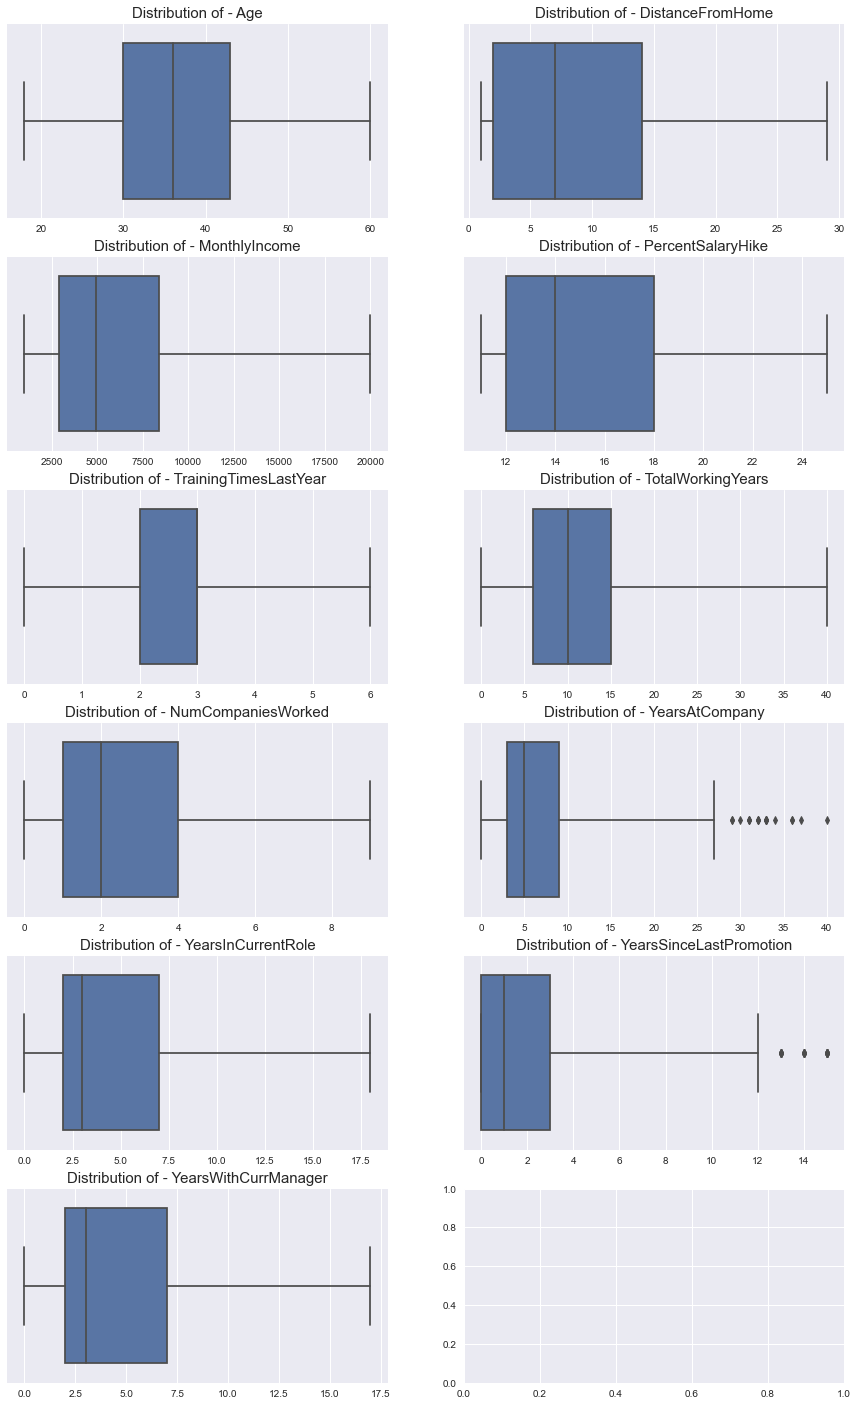

In [39]:
# plotting boxplots for continuous variables
plt.subplots(6,2, figsize=(15,25))
for plot in range(1,len(continuous_variables)+1):
    plt.subplot(6,2,plot)
    sns.boxplot(df[continuous_variables[plot-1]], whis=3)
    plt.title("Distribution of - " + continuous_variables[plot-1], fontsize = 15)
    plt.xlabel('')
plt.show()

### Handling skewness

Let's try applying log transformation to these variables to treat skewness.

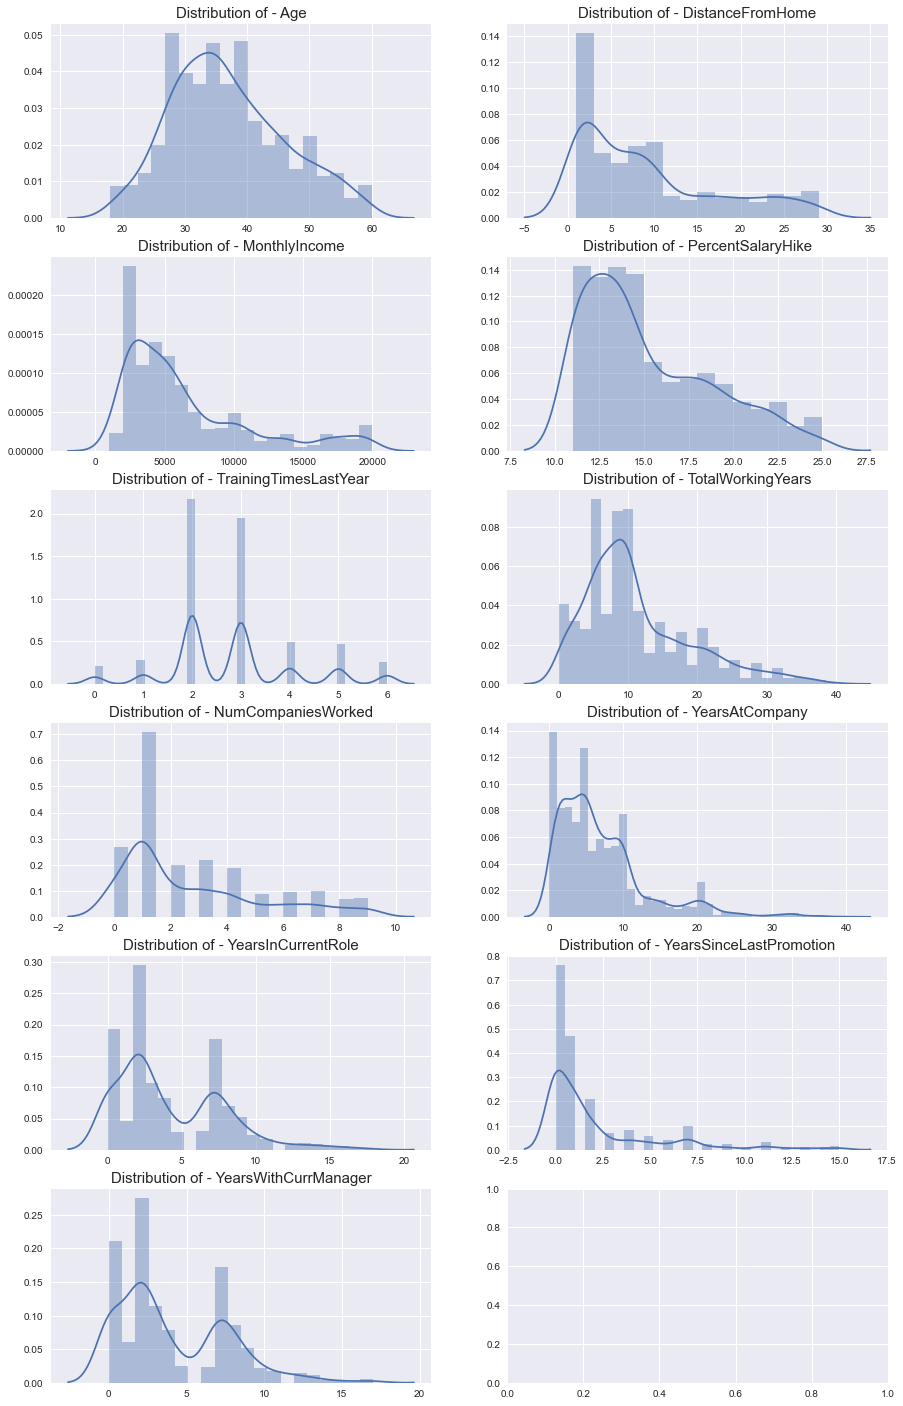

In [40]:
# plotting distribution plots for continuous variables
plt.subplots(6,2, figsize=(15,25))
for plot in range(1,len(continuous_variables)+1):
    plt.subplot(6,2,plot)
    sns.distplot(df[continuous_variables[plot-1]])
    plt.title("Distribution of - " + continuous_variables[plot-1], fontsize = 15)
    plt.xlabel('')
plt.show()

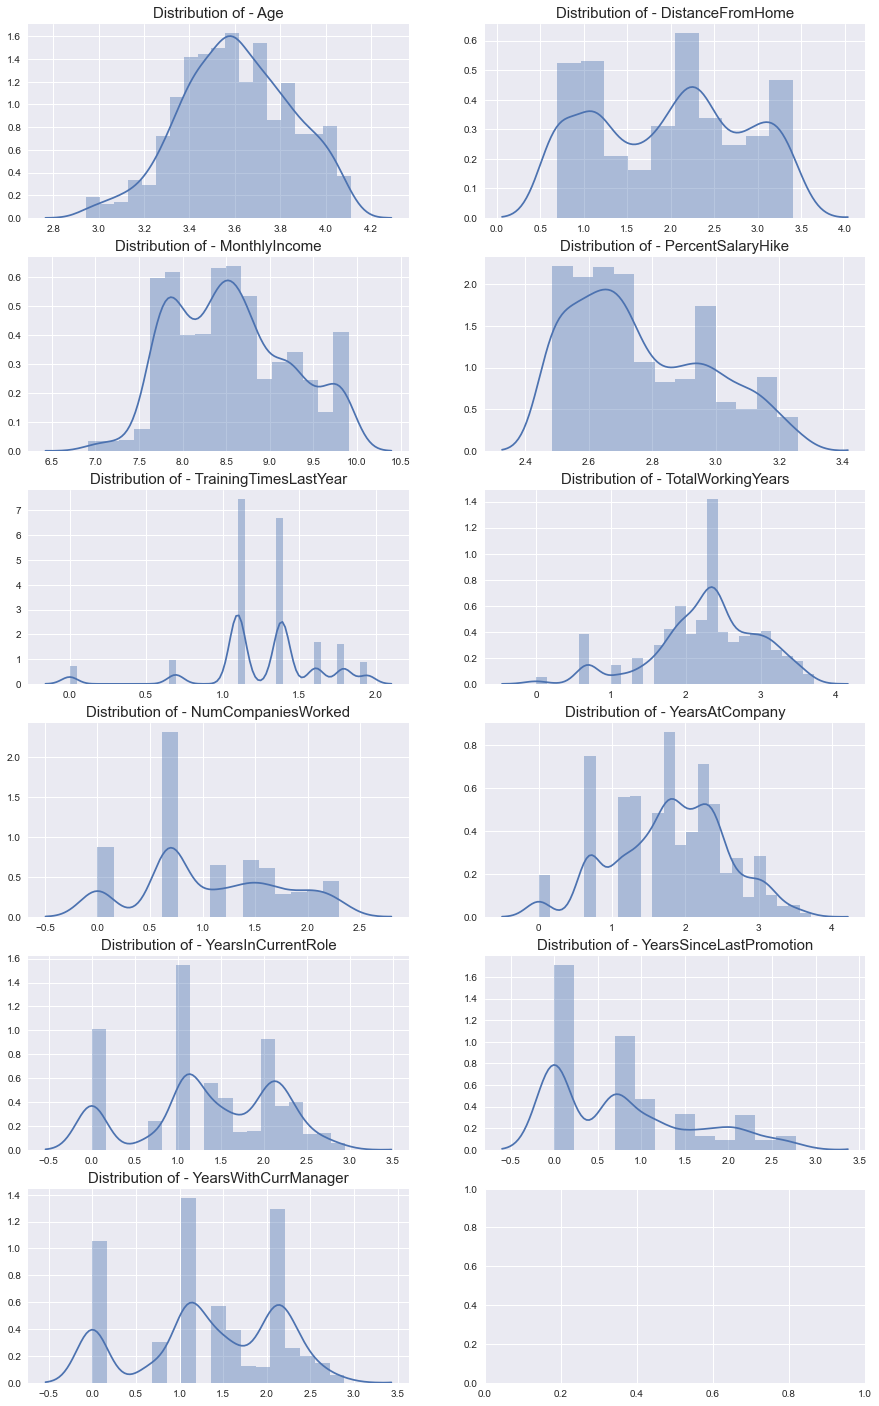

In [41]:
# plotting distribution plots for log transformed continuous variables
plt.subplots(6,2, figsize=(15,25))
for plot in range(1,len(continuous_variables)+1):
    plt.subplot(6,2,plot)
    sns.distplot(np.log1p(df[continuous_variables[plot-1]]))
    plt.title("Distribution of - " + continuous_variables[plot-1], fontsize = 15)
    plt.xlabel('')
plt.show()

**Observations:**
* Except for `Age`, `NumCompaniesWorked`, and `TrainingTimesLastYear`, log transformation can be applied to treat skewness.

In [42]:
# creating a new dataframe for log transformed variables
df_continuous_log_transformed = df[['DistanceFromHome','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

# applying log transformation
df_continuous_log_transformed = np.log1p(df_continuous_log_transformed)

# checking the dataframe head
df_continuous_log_transformed.head(3)

,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.693147,8.698514,2.484907,2.197225,1.945910,1.609438,0.000000,1.791759
1,2.197225,8.543056,3.178054,2.397895,2.397895,2.079442,0.693147,2.079442
2,1.098612,7.645398,2.772589,2.079442,0.000000,0.000000,0.000000,0.000000


## Encoding

Let's apply One Hot encoding and Label encoding to use for regression and tree based modelling accordingly.

### Label encoding

Label encoding is required for CART models.

In [43]:
# creating a new dataframe for label encoding
df_categorical_label_encoded = df[categorical_variables]

# list of columns to be encoded
columns_label_encode = ['BusinessTravel','Department','EducationField','Gender','EducationField','Gender','JobRole','MaritalStatus','OverTime']

# initializing label encoder
le = LabelEncoder()

# encoding columns
df_categorical_label_encoded[columns_label_encode] = df_categorical_label_encoded[columns_label_encode].apply(lambda col: le.fit_transform(col))

# encoding target variable
df_categorical_label_encoded['Attrition'] = df_categorical_label_encoded['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)

# checking the dataframe
df_categorical_label_encoded.head(3)

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,WorkLifeBalance,RelationshipSatisfaction,StockOptionLevel,PerformanceRating
0,1,2,2,2,1,2,0,3,2,7,4,2,1,1,1,0,3
1,0,1,1,1,1,3,1,2,2,6,2,1,0,3,4,1,4
2,1,2,1,2,4,4,1,2,1,2,3,2,1,3,2,0,3


### One hot encoding

Dummy encoding is required for distance based models.

In [44]:
# dummy encoded datafram
df_categorical_dummy_encoded = pd.get_dummies(df[categorical_variables], columns=categorical_variables[1:], drop_first=True)

# encoding attrition
df_categorical_dummy_encoded['Attrition'] = df_categorical_dummy_encoded['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)

# checking the dataframe
df_categorical_dummy_encoded.head(3)

,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,PerformanceRating_4
0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1
2,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0


In [45]:
# combining the continuous and categorical variables
df_label_encoded = pd.concat([df[continuous_variables], df_categorical_label_encoded], axis=1)

# checking the dataframe
df_label_encoded.head(3)

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TrainingTimesLastYear,TotalWorkingYears,NumCompaniesWorked,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,WorkLifeBalance,RelationshipSatisfaction,StockOptionLevel,PerformanceRating
0,41,1,5993,11,0,8,8,6,4,0,5,1,2,2,2,1,2,0,3,2,7,4,2,1,1,1,0,3
1,49,8,5130,23,3,10,1,10,7,1,7,0,1,1,1,1,3,1,2,2,6,2,1,0,3,4,1,4
2,37,2,2090,15,3,7,6,0,0,0,0,1,2,1,2,4,4,1,2,1,2,3,2,1,3,2,0,3


In [46]:
# combining the continuous and categorical variables
df_dummy_encoded = pd.concat([df[['Age','TrainingTimesLastYear','NumCompaniesWorked']], df_continuous_log_transformed, df_categorical_dummy_encoded], axis=1)

# checking the dataframe
df_dummy_encoded.head(3)

,Age,TrainingTimesLastYear,NumCompaniesWorked,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_2,Education_3,Education_4,Education_5,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Male,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,PerformanceRating_4
0,41,0,8,0.693147,8.698514,2.484907,2.197225,1.945910,1.609438,0.000000,1.791759,1,0,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
1,49,3,1,2.197225,8.543056,3.178054,2.397895,2.397895,2.079442,0.693147,2.079442,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1
2,37,3,6,1.098612,7.645398,2.772589,2.079442,0.000000,0.000000,0.000000,0.000000,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0


## Splitting data for train and test

Let's go with traditional way of splitting the data - 80% train, 20% test.

In [47]:
# splitting into dependent and independent variables
X_label_encoded = df_label_encoded.drop(columns='Attrition')
X_dummy_encoded = df_dummy_encoded.drop(columns='Attrition')
y = df_label_encoded['Attrition']

### Label encoded data

In [48]:
# splitting data into 80/20 ratio
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_label_encoded, y, test_size=0.2, random_state=1, stratify=y)

### Dummy encoded data

In [49]:
# splitting data into 80/20 ratio
X_train_de, X_test_de, y_train_de, y_test_de = train_test_split(X_dummy_encoded, y, test_size=0.2, random_state=1, stratify=y)

## Scaling continuous variables

It's important to bring all the continuous features to same scale.

In [50]:
# initializing standard scaler
ss = StandardScaler()

# fitting the scaler with train data
ss.fit(X_train_de[continuous_variables])

# transforming train data
X_train_de[continuous_variables] = ss.transform(X_train_de[continuous_variables])

# transforming test data
X_test_de[continuous_variables] = ss.transform(X_test_de[continuous_variables])

# Modelling

Before we start with data modelling, let's define our objective and some important metrics.

### What is our objective?

We want to build some classification models to predict whether an employee is going to attrite in near future, based on previous employees behavioral patterns.

### What is our cost (Type I/Type II)?

In this scenario, we do not want to incorrectly label (classify) a potential employee who will churn as 'No'. Which is a false negative, i.e. Type II errors.

### What are reliable validation metrics?

* Type II errors: A lower number of Type II errors is desirable.
* Recall (True Positive Rate): A high recall value is desirable.
* ROC AUC: A high ROC AUC value is desirable.

### What is our optimizing criteria?

Keeping the accuracy and ROC AUC value as high as possible, we need to lower Type II errors or improve recall score.

In [51]:
# results matrix
df_results = pd.DataFrame(columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Specificity','Accuracy','F1-score','ROC AUC'])

## Logistic Regression

### Iteration 1 : Base model

Let's build a basic logistic regression model with default hyperparameters.

In [52]:
# fitting the model
model_logit = LogisticRegression()
model_logit.fit(X_train_de, y_train_de)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# predicting test data
y_pred = model_logit.predict(X_test_de)

In [54]:
# checking for model overfit
print("Training accuracy:", accuracy_score(y_train_de,model_logit.predict(X_train_de)))
print("Test accuracy:", accuracy_score(y_test_de,y_pred))

Training accuracy: 0.9090136054421769
Test accuracy: 0.8707482993197279


**Observations:**
* There's only 3% difference in train and test accuracy, hence low variance.
* Model did not overfit on traning data.

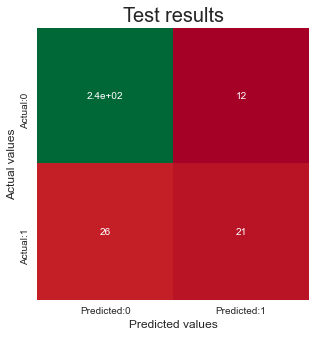

         Predicted:0 Predicted:1
Actual:0          TN          FP
Actual:1          FN          TP


In [55]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test_de,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# plotting test results confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap="RdYlGn", annot=True, cbar=False, square=True)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.title("Test results", fontsize=20)
plt.show()

cm_reference = pd.DataFrame(np.array(["TN","FP","FN","TP"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [56]:
# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)

True positives: 21
True negatives: 235
False positives (Type I error): 12
False negatives (Type II error): 26


In [57]:
# itereation results
description = "Base logit model"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test_de,y_pred),2)
recall = round(recall_score(y_test_de,y_pred),2)
specificity = round(TN/(TN+FP),2)
accuracy = round(accuracy_score(y_test_de,y_pred),2)
f1 = round(f1_score(y_test_de,y_pred),2)
auc = round(roc_auc_score(y_test_de,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     specificity,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Specificity','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Specificity,Accuracy,F1-score,ROC AUC
0,Base logit model,38,12,26,0.64,0.45,0.95,0.87,0.52,0.7


**Observations:**
* Our base model is having high accuracy, but recall is low.
* Let's work towards increasing the recall.

### Iteration 2 : Choosing optimal threshold

Let's try with penalzing the threshold value to reduce Type II errors.

In [58]:
# optimizing for minimal type II errors

# let's see how lower threshold value affects our model
list_threshold, list_type2_errors, list_rocauc_score = [], [], []

# let's predict the values on train data
y_pred = model_logit.predict_proba(X_train_de)

# trying with different threshold values
for i in range(1,10):
    y_pred_iter = binarize(y_pred, i/20)[:,1]
    list_threshold.append(i/20)
    list_type2_errors.append(confusion_matrix(y_train_de,y_pred_iter)[1,0])
    list_rocauc_score.append(roc_auc_score(y_train_de,y_pred_iter))

# comparing the results
pd.DataFrame(zip(list_threshold, list_type2_errors, list_rocauc_score), columns=["Threshold","Type II errors","ROC_AUC"])

,Threshold,Type II errors,ROC_AUC
0,0.05,12,0.724506
1,0.10,26,0.773364
2,0.15,29,0.812629
3,0.20,39,0.822318
4,0.25,47,0.823577
5,0.30,52,0.821069
6,0.35,64,0.804703
7,0.40,66,0.807046
8,0.45,83,0.768901


**Observations:**
* Model is yielding high ROC AUC score with threshold around 0.25.

In [59]:
# y_pred with threshold as 0.275
y_pred = binarize(model_logit.predict_proba(X_test_de), 0.275)[:,1]

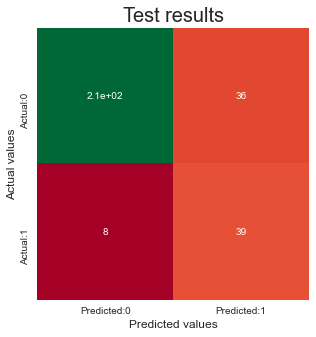

         Predicted:0 Predicted:1
Actual:0          TN          FP
Actual:1          FN          TP


In [60]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test_de,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# plotting test results confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap="RdYlGn", annot=True, cbar=False, square=True)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.title("Test results", fontsize=20)
plt.show()

cm_reference = pd.DataFrame(np.array(["TN","FP","FN","TP"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [61]:
# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)

True positives: 39
True negatives: 211
False positives (Type I error): 36
False negatives (Type II error): 8


In [62]:
# itereation results
description = "Logit model with threshold 0.275"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test_de,y_pred),2)
recall = round(recall_score(y_test_de,y_pred),2)
specificity = round(TN/(TN+FP),2)
accuracy = round(accuracy_score(y_test_de,y_pred),2)
f1 = round(f1_score(y_test_de,y_pred),2)
auc = round(roc_auc_score(y_test_de,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     specificity,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Specificity','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Specificity,Accuracy,F1-score,ROC AUC
0,Base logit model,38,12,26,0.64,0.45,0.95,0.87,0.52,0.7
0,Logit model with threshold 0.275,44,36,8,0.52,0.83,0.85,0.85,0.64,0.84


**Observations:**
* Without much drop in accuracy value, Type II errors have significantly reduced, recall and ROC AUC have significantly improved.

### Iteration 3 : Hyperparameter tuning

Let's try to reduce the variance and lower model overtfit.

In [63]:
# creating parameter grid
dict_params = {"penalty" : ["l1", "l2"],
               "C" : [0.001, 0.01, 0.1, 1, 10, 100]}

# hyperparameter tuning
base_model = LogisticRegression()
model_tuning = GridSearchCV(base_model, param_grid=dict_params, scoring="roc_auc", cv=5, return_train_score=True)
model_tuning.fit(X_train_de,y_train_de)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [64]:
# hyperparameter tuning results
cv_results = pd.DataFrame(model_tuning.cv_results_)
cv_results['train_test_diff'] = cv_results['mean_train_score'] - cv_results['mean_test_score']
cv_results.sort_values('mean_test_score', ascending=False)[["param_C","param_penalty","mean_train_score","mean_test_score",'train_test_diff']]

,param_C,param_penalty,mean_train_score,mean_test_score,train_test_diff
7,1,l2,0.897485,0.850027,0.047457
9,10,l2,0.900928,0.848320,0.052608
6,1,l1,0.894644,0.847413,0.047230
8,10,l1,0.901141,0.846425,0.054716
11,100,l2,0.901862,0.845252,0.056610
10,100,l1,0.901955,0.845092,0.056864
5,0.1,l2,0.877631,0.838603,0.039028
4,0.1,l1,0.827894,0.791653,0.036241
3,0.01,l2,0.815815,0.788799,0.027016
1,0.001,l2,0.746755,0.733551,0.013204


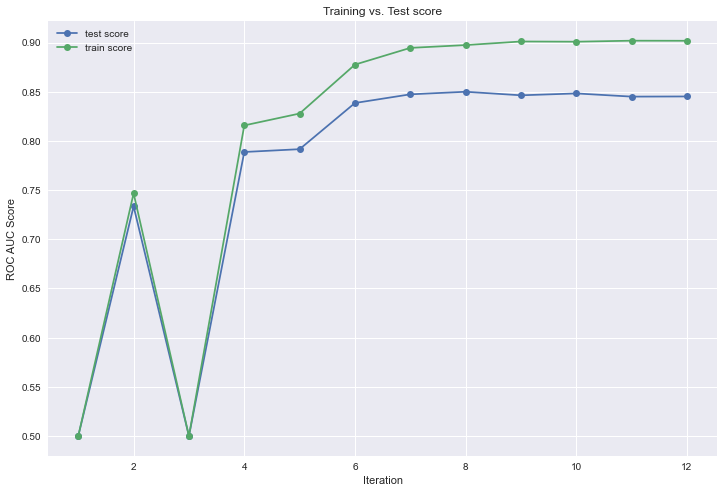

In [65]:
# visualizing training and testing accuracy
plt.figure(figsize=(12,8))
plt.plot(cv_results.index+1, cv_results["mean_test_score"], label="test score", marker='o')
plt.plot(cv_results.index+1, cv_results["mean_train_score"], label="train score", marker='o')
plt.title("Training vs. Test score")
plt.ylabel("ROC AUC Score")
plt.xlabel("Iteration")
plt.legend()
plt.show()

**Observations:**
* Since the proportion of dummy variables in input features is more, let's go with lasso (L1) regularization.

In [66]:
# fitting model with best params
model_logit = LogisticRegression(penalty='l1', C=1)
model_logit.fit(X_train_de, y_train_de)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
# setting threshold 0.275
y_pred = binarize(model_logit.predict_proba(X_test_de), 0.275)[:,1]

In [68]:
# checking for model overfit
print("Training accuracy:", accuracy_score(y_train_de,model_logit.predict(X_train_de)))
print("Test accuracy:", accuracy_score(y_test_de,y_pred))

Training accuracy: 0.9039115646258503
Test accuracy: 0.8639455782312925


**Observations:**
* There is no significant difference in train and test score, suggesting little or no overfitting.

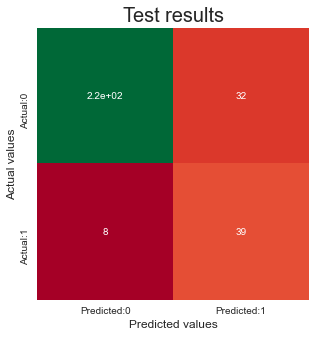

         Predicted:0 Predicted:1
Actual:0          TN          FP
Actual:1          FN          TP


In [69]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test_de,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# plotting test results confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap="RdYlGn", annot=True, cbar=False, square=True)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.title("Test results", fontsize=20)
plt.show()

cm_reference = pd.DataFrame(np.array(["TN","FP","FN","TP"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [70]:
# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)

True positives: 39
True negatives: 215
False positives (Type I error): 32
False negatives (Type II error): 8


In [71]:
# itereation results
description = "Hyperparameter tuning and 0.275 threshold"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test_de,y_pred),2)
recall = round(recall_score(y_test_de,y_pred),2)
specificity = round(TN/(TN+FP),2)
accuracy = round(accuracy_score(y_test_de,y_pred),2)
f1 = round(f1_score(y_test_de,y_pred),2)
auc = round(roc_auc_score(y_test_de,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     specificity,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Specificity','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Specificity,Accuracy,F1-score,ROC AUC
0,Base logit model,38,12,26,0.64,0.45,0.95,0.87,0.52,0.7
0,Logit model with threshold 0.275,44,36,8,0.52,0.83,0.85,0.85,0.64,0.84
0,Hyperparameter tuning and 0.275 threshold,40,32,8,0.55,0.83,0.87,0.86,0.66,0.85


**Observations:**
* Logit model with penalty=lasso regression and lambda=1, threshold set to 0.275 is giving the best results.

### Feature Importance

Let's visualize the important features with regard to logistic regression model.

In [72]:
# model performance and feature selection using RFE
list_cv_results = []
for i in range(1, len(X_dummy_encoded.columns)+1):
    model_rfe = RFE(LogisticRegression(), i)
    list_cv_results.append(cross_val_score(model_rfe, X_dummy_encoded, y, cv=5, scoring='roc_auc').mean())

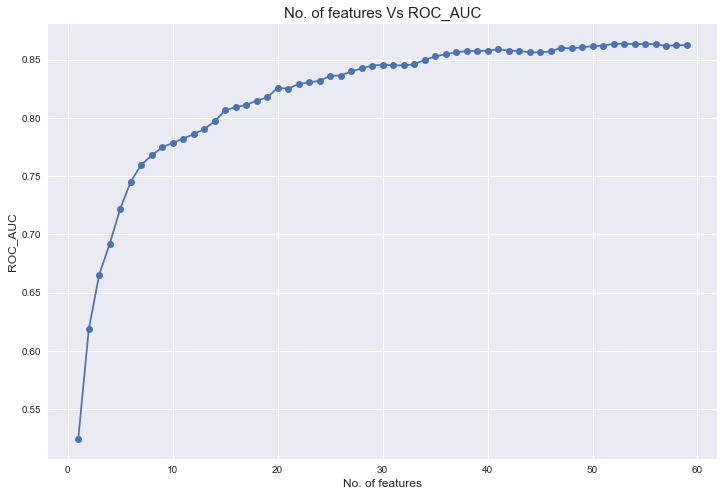

In [73]:
# plotting the results
plt.figure(figsize=(12,8))
plt.plot(range(1, len(X_dummy_encoded.columns)+1), list_cv_results, marker='o')
plt.xlabel('No. of features', fontsize=12)
plt.ylabel('ROC_AUC', fontsize=12)
plt.title('No. of features Vs ROC_AUC', fontsize=15)
plt.show()

* There is significant increase in model performance with 4, 11 & 13 features.

In [74]:
# selecting model with 4 features
model_rfe_4 = RFE(LogisticRegression(), 4)
model_rfe_4.fit(X_train_de, y_train_de)

# selecting model with 11 features
model_rfe_11 = RFE(LogisticRegression(), 11)
model_rfe_11.fit(X_train_de, y_train_de)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=11, step=1, verbose=0)

In [75]:
# printing the important features
print("List of 4 important features:", list(X_dummy_encoded.columns[model_rfe_4.support_])); print()
print("List of 11 important features:", list(X_dummy_encoded.columns[model_rfe_11.support_]))

List of 4 important features: ['JobRole_Research Director', 'OverTime_Yes', 'StockOptionLevel_1', 'StockOptionLevel_2']

List of 11 important features: ['BusinessTravel_Travel_Frequently', 'EducationField_Technical Degree', 'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3', 'EnvironmentSatisfaction_4', 'JobInvolvement_4', 'JobLevel_2', 'JobRole_Research Director', 'OverTime_Yes', 'StockOptionLevel_1', 'StockOptionLevel_2']


**Observations:**
* To summarise, `JobRole`, `OverTime`, `StockLevelOption`, `BusinessTravel`, `JobInvolvement`, `EnvironmentSatisfaction` are important factors that help us predict attrition.

## Decision Tree Classifier

### Base model

Let's build a base model with default hyperparameters. Since CART models are non-parametric models, we should expect model overfit.

In [76]:
# building a base model
model_tree = DecisionTreeClassifier(random_state=1)
model_tree.fit(X_train_le, y_train_le)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [77]:
# predicting using test data
y_pred = model_tree.predict(X_test_le)

In [78]:
# checking for model overfit
print("Training accuracy:", accuracy_score(y_train_le,model_tree.predict(X_train_le)))
print("Test accuracy:", accuracy_score(y_test_le,y_pred))

Training accuracy: 1.0
Test accuracy: 0.7789115646258503


**Observations:**
* There is huge difference in train and test accuracy suggesting there is model overfit.
* This is expected behavior with un-pruned (without regularization) CART model.

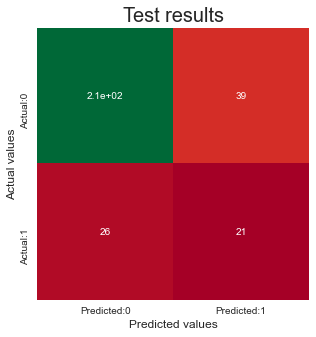

         Predicted:0 Predicted:1
Actual:0          TN          FP
Actual:1          FN          TP


In [79]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test_le,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# plotting test results confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap="RdYlGn", annot=True, cbar=False, square=True)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.title("Test results", fontsize=20)
plt.show()

cm_reference = pd.DataFrame(np.array(["TN","FP","FN","TP"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [80]:
# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)

True positives: 21
True negatives: 208
False positives (Type I error): 39
False negatives (Type II error): 26


In [81]:
# itereation results
description = "Base tree model"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test_de,y_pred),2)
recall = round(recall_score(y_test_de,y_pred),2)
specificity = round(TN/(TN+FP),2)
accuracy = round(accuracy_score(y_test_de,y_pred),2)
f1 = round(f1_score(y_test_de,y_pred),2)
auc = round(roc_auc_score(y_test_de,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     specificity,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Specificity','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Specificity,Accuracy,F1-score,ROC AUC
0,Base logit model,38,12,26,0.64,0.45,0.95,0.87,0.52,0.7
0,Logit model with threshold 0.275,44,36,8,0.52,0.83,0.85,0.85,0.64,0.84
0,Hyperparameter tuning and 0.275 threshold,40,32,8,0.55,0.83,0.87,0.86,0.66,0.85
0,Base tree model,65,39,26,0.35,0.45,0.84,0.78,0.39,0.64


**Observations:**
* Not bad for an initial overfit tree model.

### Regularization - Tree pruning

Let's prune the tree to control model overfit.

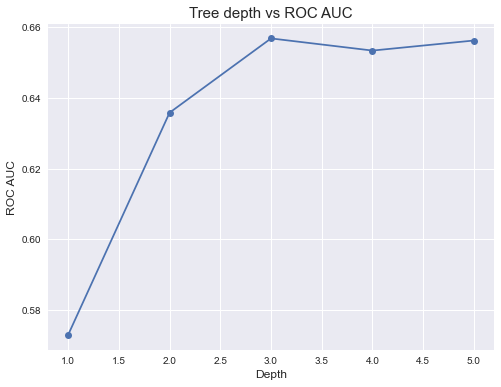

In [82]:
# controlling the depth
list_roc_auc = []
for i in range(1,6):
    model = DecisionTreeClassifier(max_depth=i, random_state=1)
    list_roc_auc.append(cross_val_score(model, X_train_le, y_train_le, cv=5, scoring='roc_auc').mean())

plt.figure(figsize=(8,6))
plt.plot(range(1,6), list_roc_auc, marker='o')
plt.title('Tree depth vs ROC AUC', fontsize=15)
plt.xlabel('Depth', fontsize=12)
plt.ylabel('ROC AUC', fontsize=12)
plt.show()

**Observations:**
* The above graph shows that a tree with max_depth 3 is having the best balance between bias-variance.

In [83]:
# building a tree with max_depth 3
model_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
model_tree.fit(X_train_le, y_train_le)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [84]:
# predicting using test data
y_pred = model_tree.predict(X_test_le)

In [85]:
# checking for model overfit
print("Training accuracy:", accuracy_score(y_train_le,model_tree.predict(X_train_le)))
print("Test accuracy:", accuracy_score(y_test_le,y_pred))

Training accuracy: 0.8647959183673469
Test accuracy: 0.8469387755102041


**Observations:**
* Since there is very small difference in train and test accuracy, there is no or little model overfit.
* Restricting the tree depth had significantly reduced variance i.e. overfit.

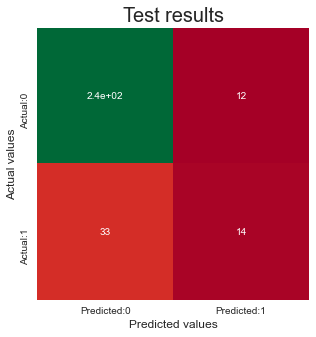

         Predicted:0 Predicted:1
Actual:0          TN          FP
Actual:1          FN          TP


In [86]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test_le,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# plotting test results confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap="RdYlGn", annot=True, cbar=False, square=True)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.title("Test results", fontsize=20)
plt.show()

cm_reference = pd.DataFrame(np.array(["TN","FP","FN","TP"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [87]:
# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)

True positives: 14
True negatives: 235
False positives (Type I error): 12
False negatives (Type II error): 33


In [88]:
# itereation results
description = "Tree with depth 3"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test_de,y_pred),2)
recall = round(recall_score(y_test_de,y_pred),2)
specificity = round(TN/(TN+FP),2)
accuracy = round(accuracy_score(y_test_de,y_pred),2)
f1 = round(f1_score(y_test_de,y_pred),2)
auc = round(roc_auc_score(y_test_de,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     specificity,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Specificity','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Specificity,Accuracy,F1-score,ROC AUC
0,Base logit model,38,12,26,0.64,0.45,0.95,0.87,0.52,0.7
0,Logit model with threshold 0.275,44,36,8,0.52,0.83,0.85,0.85,0.64,0.84
0,Hyperparameter tuning and 0.275 threshold,40,32,8,0.55,0.83,0.87,0.86,0.66,0.85
0,Base tree model,65,39,26,0.35,0.45,0.84,0.78,0.39,0.64
0,Tree with depth 3,45,12,33,0.54,0.3,0.95,0.85,0.38,0.62


**Observations:**
* Accuracy has imporved, but type II errors have increased.
* This is because there is significant class imbalance in target variable.

### Hyperparameter tuning

Let's optimize the tree by finding the best hyperparameters.

In [89]:
# hyperparameter grid
dict_params = {'max_depth' : [2,3,4],
               'max_features' : [5,8,11,14,17,20,23],
               'class_weight' : [{0:0.2,1:1},{0:0.3,1:1},{0:0.4,1:1},{0:0.5,1:1}]}

# model to tune
model = DecisionTreeClassifier(random_state=1)
# hyperparameter tuning
model_tuning = GridSearchCV(model, param_grid=dict_params, scoring="recall", cv=5, return_train_score=True, n_jobs=-1)
model_tuning.fit(X_train_le,y_train_le)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'class_weight': [{0: 0.2, 1: 1}, {0: 0.3, 1: 1},
                                          {0: 0.4, 1: 1}, {0: 0.5, 

In [90]:
# model results
cv_results = pd.DataFrame(model_tuning.cv_results_)
cv_results['train_test_diff'] = cv_results['mean_train_score'] - cv_results['mean_test_score']
cv_results.sort_values('mean_test_score', ascending=False)[["param_max_depth","param_class_weight","param_max_features","mean_train_score","mean_test_score",'train_test_diff']]

,param_max_depth,param_class_weight,param_max_features,mean_train_score,mean_test_score,train_test_diff
4,2,"{0: 0.2, 1: 1}",17,0.773684,0.705312,0.068372
3,2,"{0: 0.2, 1: 1}",14,0.721053,0.652726,0.068327
5,2,"{0: 0.2, 1: 1}",20,0.761842,0.647467,0.114375
1,2,"{0: 0.2, 1: 1}",8,0.660526,0.589621,0.070905
6,2,"{0: 0.2, 1: 1}",23,0.665789,0.568318,0.097471
14,4,"{0: 0.2, 1: 1}",5,0.671053,0.552699,0.118354
20,4,"{0: 0.2, 1: 1}",23,0.711842,0.542204,0.169638
17,4,"{0: 0.2, 1: 1}",14,0.752632,0.526383,0.226249
18,4,"{0: 0.2, 1: 1}",17,0.732895,0.526361,0.206534
7,3,"{0: 0.2, 1: 1}",5,0.581579,0.500000,0.081579


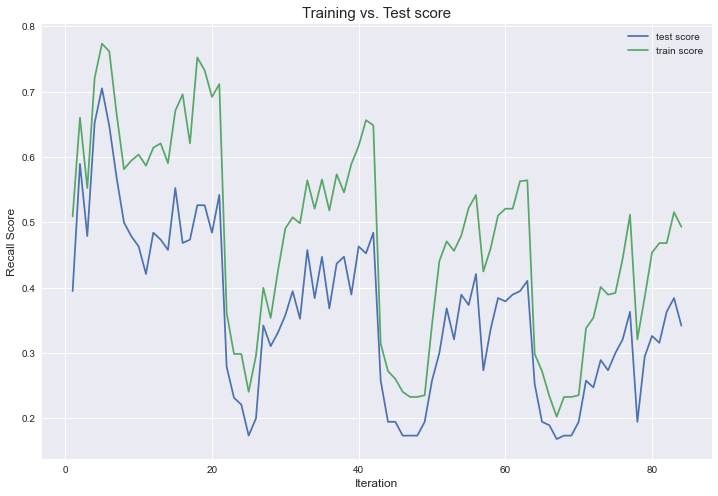

In [91]:
# visualizing training and testing accuracy
plt.figure(figsize=(12,8))
plt.plot(cv_results.index+1, cv_results["mean_test_score"], label="test score")
plt.plot(cv_results.index+1, cv_results["mean_train_score"], label="train score")
plt.title("Training vs. Test score", fontsize=15)
plt.ylabel("Recall Score", fontsize=12)
plt.xlabel("Iteration", fontsize=12)
plt.legend()
plt.show()

**Observations:**
* A class weight distribution of (No:0.2, Yes:1) is giving the highest recall value as we can see.
* From previous analysis we have seen that a tree with depth 3 is having a good bias-variance balance.

In [92]:
# building tunned tree
model_tree_tuned = DecisionTreeClassifier(max_depth=3, max_features=11, class_weight={0:0.2, 1:1}, random_state=1)
model_tree_tuned.fit(X_train_le, y_train_le)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 1}, criterion='gini',
                       max_depth=3, max_features=11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [93]:
# predicting using test data
y_pred = model_tree_tuned.predict(X_test_le)

In [94]:
# checking for model overfit
print("Training accuracy:", accuracy_score(y_train_le,model_tree_tuned.predict(X_train_le)))
print("Test accuracy:", accuracy_score(y_test_le,y_pred))

Training accuracy: 0.810374149659864
Test accuracy: 0.7993197278911565


**Observations:**
* A very small difference in train and test accuracy suggests that there is little or no model overfit.

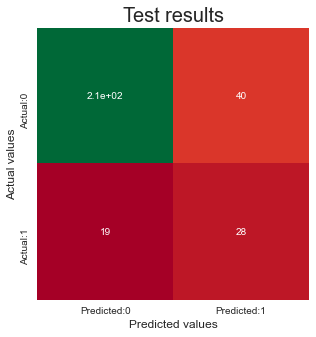

         Predicted:0 Predicted:1
Actual:0          TN          FP
Actual:1          FN          TP


In [95]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test_le,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# plotting test results confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap="RdYlGn", annot=True, cbar=False, square=True)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.title("Test results", fontsize=20)
plt.show()

cm_reference = pd.DataFrame(np.array(["TN","FP","FN","TP"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [96]:
# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)

True positives: 28
True negatives: 207
False positives (Type I error): 40
False negatives (Type II error): 19


In [97]:
# itereation results
description = "Tree with hyperparameter tuning"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test_de,y_pred),2)
recall = round(recall_score(y_test_de,y_pred),2)
specificity = round(TN/(TN+FP),2)
accuracy = round(accuracy_score(y_test_de,y_pred),2)
f1 = round(f1_score(y_test_de,y_pred),2)
auc = round(roc_auc_score(y_test_de,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     specificity,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Specificity','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Specificity,Accuracy,F1-score,ROC AUC
0,Base logit model,38,12,26,0.64,0.45,0.95,0.87,0.52,0.7
0,Logit model with threshold 0.275,44,36,8,0.52,0.83,0.85,0.85,0.64,0.84
0,Hyperparameter tuning and 0.275 threshold,40,32,8,0.55,0.83,0.87,0.86,0.66,0.85
0,Base tree model,65,39,26,0.35,0.45,0.84,0.78,0.39,0.64
0,Tree with depth 3,45,12,33,0.54,0.3,0.95,0.85,0.38,0.62
0,Tree with hyperparameter tuning,59,40,19,0.41,0.6,0.84,0.8,0.49,0.72


**Observations:**
* There is significant decrease in Type II errors, increase in recall score and ROC AUC score.
* But, these scores are not good enough and our optimized logit model is performing way better that CART model.

### Feature importance

Let's see what are some of the important features according to CART model that help us predict attrition.

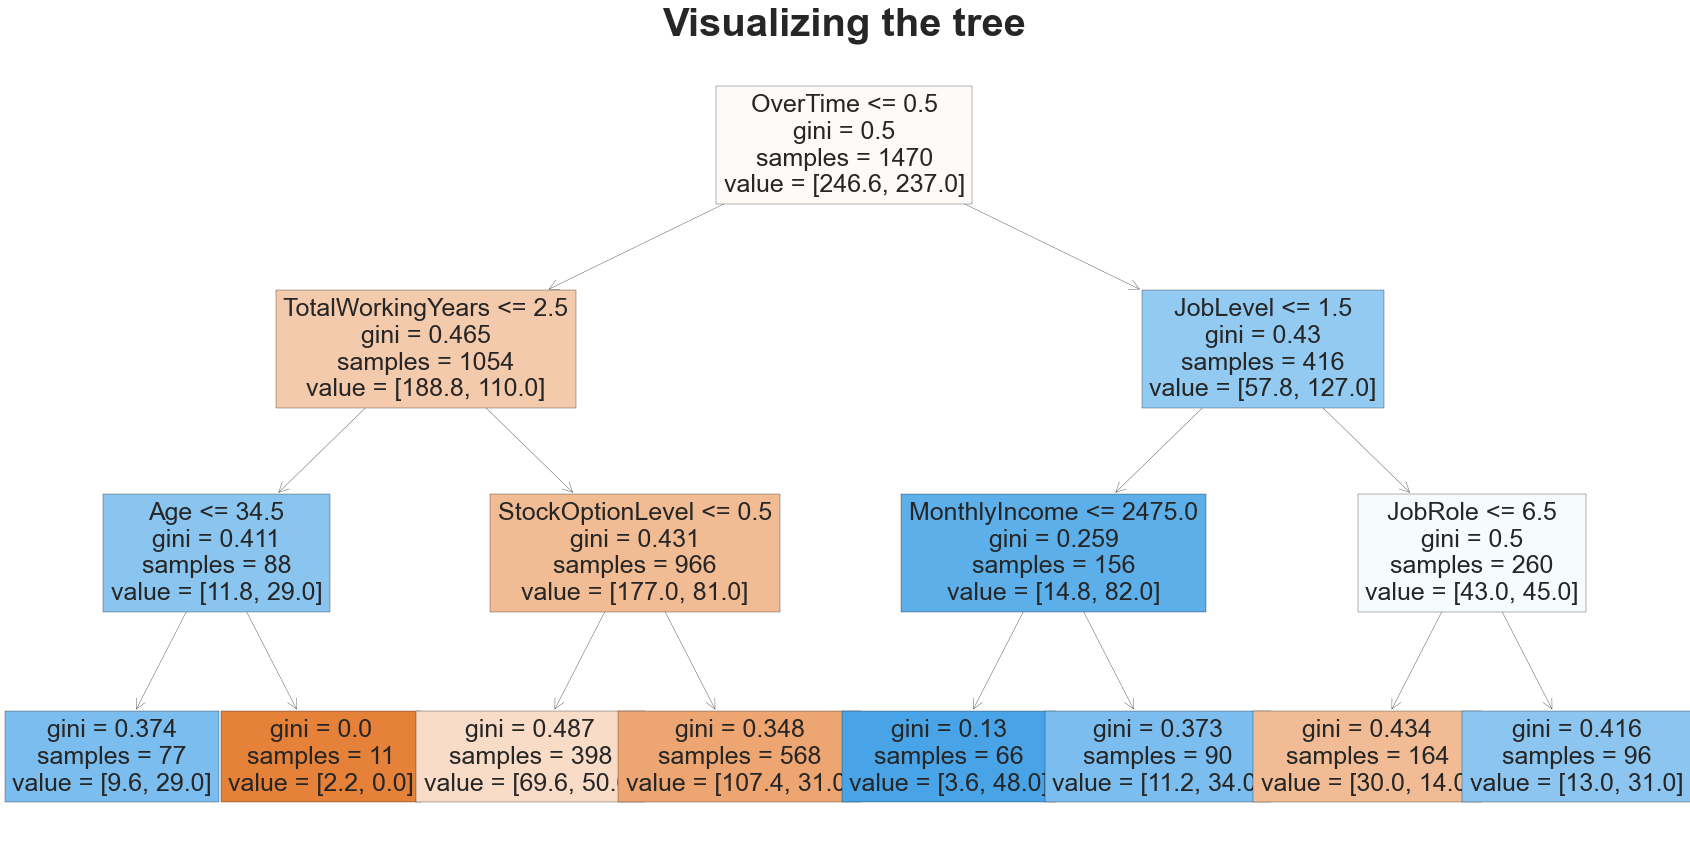

In [127]:
plt.figure(figsize=(30,15))
plot_tree(DecisionTreeClassifier(max_depth=3, class_weight={0:0.2, 1:1}).fit(X_label_encoded, y), max_depth=3, feature_names=X_label_encoded.columns, fontsize=25, filled=True)
plt.title('Visualizing the tree', fontsize=40, fontweight='bold')
plt.show()

**Observations:**
* `OverTime`, `JobLevel`, `TotalWorkingYears`, `StockOptionLevel`, `MonthlyIncome`, `JobRole`, `Age` are some of the important factors that help us predict attrition.

## Random Forest Classifier

We have seen that an individual CART model is not giving best possible results. Let's try ensembling number of weak learner CART models and see if it improves the results.

### Base model

Let's start with a base model with default hyperparameters. Since these are many individual unpruned CART models, we should expect some model overfit.

In [99]:
# building base model with default hyperparameters
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train_le, y_train_le)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [100]:
# predicting using test data
y_pred = model_rf.predict(X_test_le)

In [101]:
# checking for model overfit
print("Training accuracy:", accuracy_score(y_train_le, model_rf.predict(X_train_le)))
print("Test accuracy:", accuracy_score(y_test_le, y_pred))

Training accuracy: 0.9804421768707483
Test accuracy: 0.8367346938775511


**Observations:**
* As expected, there is huge difference in train and test accuracy suggesting high variance i.e. model overfit.

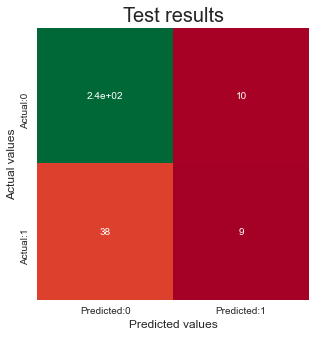

         Predicted:0 Predicted:1
Actual:0          TN          FP
Actual:1          FN          TP


In [102]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test_le,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# plotting test results confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap="RdYlGn", annot=True, cbar=False, square=True)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.title("Test results", fontsize=20)
plt.show()

cm_reference = pd.DataFrame(np.array(["TN","FP","FN","TP"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [103]:
# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)

True positives: 9
True negatives: 237
False positives (Type I error): 10
False negatives (Type II error): 38


In [104]:
# itereation results
description = "Random Forest base model"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test_de,y_pred),2)
recall = round(recall_score(y_test_de,y_pred),2)
specificity = round(TN/(TN+FP),2)
accuracy = round(accuracy_score(y_test_de,y_pred),2)
f1 = round(f1_score(y_test_de,y_pred),2)
auc = round(roc_auc_score(y_test_de,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     specificity,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Specificity','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Specificity,Accuracy,F1-score,ROC AUC
0,Base logit model,38,12,26,0.64,0.45,0.95,0.87,0.52,0.7
0,Logit model with threshold 0.275,44,36,8,0.52,0.83,0.85,0.85,0.64,0.84
0,Hyperparameter tuning and 0.275 threshold,40,32,8,0.55,0.83,0.87,0.86,0.66,0.85
0,Base tree model,65,39,26,0.35,0.45,0.84,0.78,0.39,0.64
0,Tree with depth 3,45,12,33,0.54,0.3,0.95,0.85,0.38,0.62
0,Tree with hyperparameter tuning,59,40,19,0.41,0.6,0.84,0.8,0.49,0.72
0,Random Forest base model,48,10,38,0.47,0.19,0.96,0.84,0.27,0.58


**Observations:**
* Model accuracy is good, but our important measures of success, recall, ROC AUC, Type II erros, are not satisfactory.

### Hyperparameter tuning

Let's try to prune the individual CART models and leverage the power of ensembling weak learners.

In [105]:
# hyperparameter grid
dict_params = {'n_estimators' : [10,20,30,40,50,60,70,80,90,100],
               'max_features' : [3,5,7,9,11],
               'max_depth' : [2,3],
               'class_weight' : [{0:0.2,1:1}]}

# model to tune
model = RandomForestClassifier(random_state=1)
# hyperparameter tuning
model_tuning = GridSearchCV(model, param_grid=dict_params, scoring='roc_auc', cv=5, return_train_score=True, n_jobs=-1)
model_tuning.fit(X_train_le,y_train_le)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'cla

In [106]:
# model results
cv_results = pd.DataFrame(model_tuning.cv_results_)
cv_results['train_test_diff'] = cv_results['mean_train_score'] - cv_results['mean_test_score']
cv_results.sort_values('train_test_diff', ascending=True)[["param_n_estimators","param_max_depth","param_max_features","mean_train_score","mean_test_score",'train_test_diff']]

,param_n_estimators,param_max_depth,param_max_features,mean_train_score,mean_test_score,train_test_diff
10,10,2,5,0.763620,0.720492,0.043128
11,20,2,5,0.791685,0.740389,0.051297
20,10,2,7,0.791476,0.739544,0.051931
21,20,2,7,0.799653,0.744418,0.055236
30,10,2,9,0.794105,0.738089,0.056017
40,10,2,11,0.787116,0.730802,0.056314
1,20,2,3,0.797407,0.740796,0.056611
4,50,2,3,0.807581,0.750930,0.056651
12,30,2,5,0.802840,0.745128,0.057712
2,30,2,3,0.810784,0.752863,0.057921


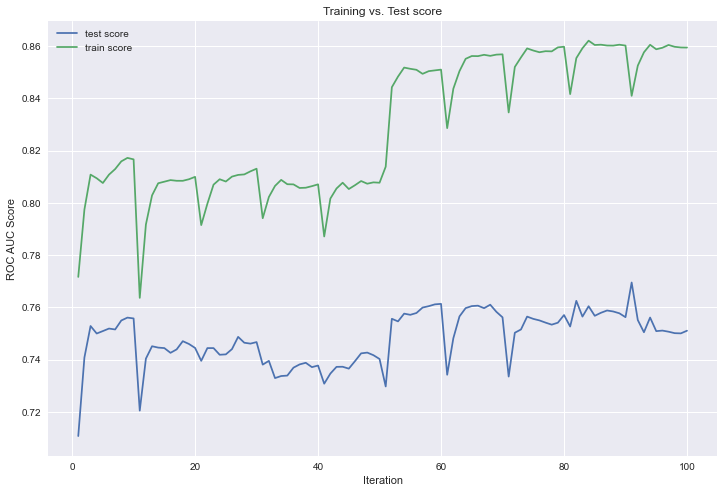

In [107]:
# visualizing training and testing accuracy
plt.figure(figsize=(12,8))
plt.plot(cv_results.index+1, cv_results["mean_test_score"], label="test score")
plt.plot(cv_results.index+1, cv_results["mean_train_score"], label="train score")
plt.title("Training vs. Test score")
plt.ylabel("ROC AUC Score")
plt.xlabel("Iteration")
plt.legend()
plt.show()

In [108]:
# building base model with tuned hyperparameters
model_rf_tuned = RandomForestClassifier(n_estimators=80, max_depth=3, max_features=3, class_weight={0:0.2, 1:1}, random_state=1)
model_rf_tuned.fit(X_train_le, y_train_le)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.2, 1: 1},
                       criterion='gini', max_depth=3, max_features=3,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=80, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

In [109]:
# predicting using test data
y_pred = model_rf_tuned.predict(X_test_le)

In [110]:
# checking for model overfit
print("Training accuracy:", accuracy_score(y_train_le, model_rf_tuned.predict(X_train_le)))
print("Test accuracy:", accuracy_score(y_test_le, y_pred))

Training accuracy: 0.8231292517006803
Test accuracy: 0.7993197278911565


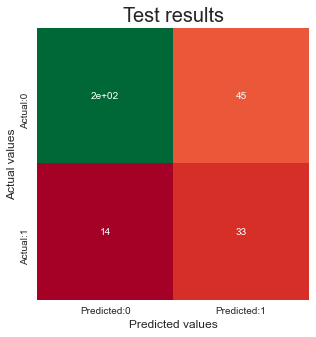

         Predicted:0 Predicted:1
Actual:0          TN          FP
Actual:1          FN          TP


In [111]:
# confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test_le,y_pred), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])

# plotting test results confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap="RdYlGn", annot=True, cbar=False, square=True)
plt.xlabel("Predicted values", fontsize=12)
plt.ylabel("Actual values", fontsize=12)
plt.title("Test results", fontsize=20)
plt.show()

cm_reference = pd.DataFrame(np.array(["TN","FP","FN","TP"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

In [112]:
# calculating TP,TN,FP,FN
TN, FP, FN, TP = cm.iloc[0,0], cm.iloc[0,1], cm.iloc[1,0], cm.iloc[1,1]

# print values
print("True positives:", TP)
print("True negatives:", TN)
print("False positives (Type I error):", FP)
print("False negatives (Type II error):", FN)

True positives: 33
True negatives: 202
False positives (Type I error): 45
False negatives (Type II error): 14


In [113]:
# itereation results
description = "Tuned random forest model"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test_de,y_pred),2)
recall = round(recall_score(y_test_de,y_pred),2)
specificity = round(TN/(TN+FP),2)
accuracy = round(accuracy_score(y_test_de,y_pred),2)
f1 = round(f1_score(y_test_de,y_pred),2)
auc = round(roc_auc_score(y_test_de,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     specificity,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Specificity','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0, ignore_index=True)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Specificity,Accuracy,F1-score,ROC AUC
0,Base logit model,38,12,26,0.64,0.45,0.95,0.87,0.52,0.7
1,Logit model with threshold 0.275,44,36,8,0.52,0.83,0.85,0.85,0.64,0.84
2,Hyperparameter tuning and 0.275 threshold,40,32,8,0.55,0.83,0.87,0.86,0.66,0.85
3,Base tree model,65,39,26,0.35,0.45,0.84,0.78,0.39,0.64
4,Tree with depth 3,45,12,33,0.54,0.3,0.95,0.85,0.38,0.62
5,Tree with hyperparameter tuning,59,40,19,0.41,0.6,0.84,0.8,0.49,0.72
6,Random Forest base model,48,10,38,0.47,0.19,0.96,0.84,0.27,0.58
7,Tuned random forest model,59,45,14,0.42,0.7,0.82,0.8,0.53,0.76


**Observations:**
* Optimized random forest model is better than tuned single CART model, but is not better than tuned logit model.
* In conclusion, we would choose optimized logit model to get the best possible results.

### Feature importance

Let's see what are some of the important features according to random forest model that help us predict attrition.

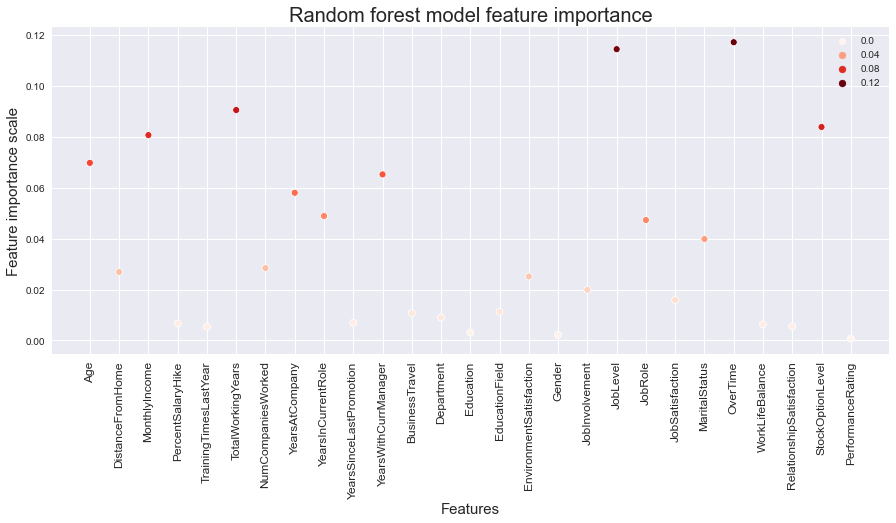

In [114]:
# pd.DataFrame(zip(X_label_encoded.columns, model_rf_tuned.feature_importances_))
plt.figure(figsize=(15,6))
model = RandomForestClassifier(n_estimators=80, max_depth=3, max_features=3, class_weight={0:0.2, 1:1}, random_state=1).fit(X_label_encoded, y)
sns.scatterplot(X_label_encoded.columns, model.feature_importances_, hue=model.feature_importances_, palette='Reds')
plt.xticks(rotation=90, size=12)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature importance scale', fontsize=15)
plt.title('Random forest model feature importance', fontsize=20)
plt.show()

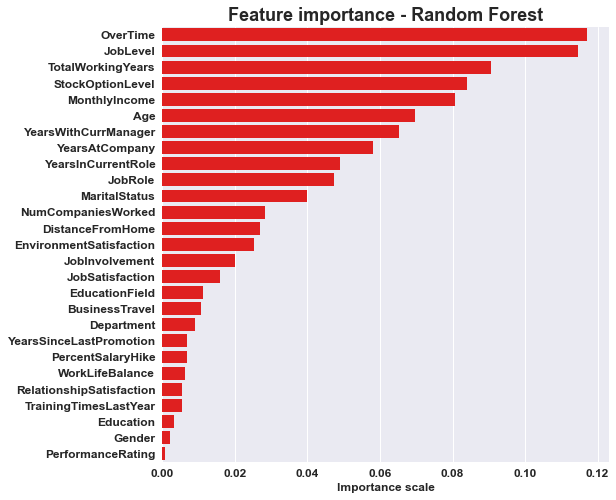

In [115]:
# feature importance score
plt.figure(figsize=(8,8))
sns.barplot(y=0, x=1, data=pd.DataFrame(zip(X_label_encoded.columns, model.feature_importances_)).sort_values(1, ascending=False), orient='h', color='red')
plt.title('Feature importance - Random Forest', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xlabel('Importance scale', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.show()

**Observations:**
* `OverTime`, `JobLevel`, `TotalWorkingYears`, `StockOptionLevel`, `MonthlyIncome` are the most important features.

# Conclusion

## Model choice

Let's comapare different models against defined metrics that measure model performance.

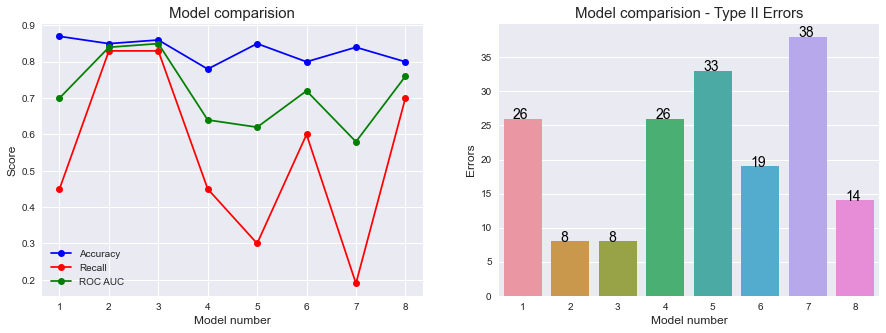

In [116]:
# comparision of models
plt.subplots(1,2, figsize=(15,5))

# line plots
plt.subplot(1,2,1)
plt.plot(range(1,9), df_results['Accuracy'].astype('float'), color='blue', marker='o', label='Accuracy')
plt.plot(range(1,9), df_results['Recall'].astype('float'), color='red', marker='o', label='Recall')
plt.plot(range(1,9), df_results['ROC AUC'].astype('float'), color='green', marker='o', label='ROC AUC')
plt.title('Model comparision', fontsize=15)
plt.xlabel('Model number', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()

# bar plot
plt.subplot(1,2,2)
ax = sns.barplot(['1','2','3','4','5','6','7','8'], df_results['Type II errors'].astype('float'))
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.2, i.get_height(), str(int(i.get_height())), fontsize=14, color='black')
plt.title('Model comparision - Type II Errors', fontsize=15)
plt.xlabel('Model number', fontsize=12)
plt.ylabel('Errors', fontsize=12)

plt.show()

**Observations:**
* Model 3 is having high Recall, Accuracy and ROC AUC scores, also least number of Type II errors.
* Our choice of final model is logistic regression model with lasso penalty, lambda as 1 and threshold value of 0.275.

## Important variables

Three most important variables are:
1. `OverTime`
2. `JobLevel`
3. `StockOptionLevel`

Other important variables are:
* `MonthlyIncome`
* `TotalWorkingYears`
* `BusinessTravel`
* `JobRole`
* `JobInvolvement`

## Summarising the reasons for employee attrition

1. `OverTime` is definitely a clear cause for employees to churn. Employees who feel that they are working over time tend to churn and settle for a less hectic job role.

2. Employees at lower `JobLevel` tend to churn more. This can be due to several reasons, like higher income, promotion, or maybe leaving company to pursue education.

3. `StockOptionLevel` can also be an important factor that would influence employee attrition. There is higher proportion of attrition in stock option level 0 and 3. If provided with company stocks, employees have higher levels of involvement and feel more connected to the company and work and tend to churn less. There's also higher proportion of attrition among employees highest stock option level, senior and executive position employees are given this option and this age group has attrition due to retirement, which is normal.

4. `JobInvolvement` can drive employee attrition. There's higher proportion of churn among employees who feel that their involvement in job is low. They might feel that they are under utilised and tend to churn more.

5. Higher levels of `OverTime` combined with lower `MonthlyIncome` has been driving higher `Attrition` levels in Sales Representative `JobRole`.